# 1.Background（背景）

基于上述最优子集、逐步回归、LASSO回归筛选出的变量分别进行cox回归模型构建后，我们将涉及模型的评价，根据数据集的来源不同，可以通过内部验证和（或）外部验证对模型的区分度（Discrimination）、校准度（Calibration）和决策曲线三个方面进行评价。

# 2.原理和方法

## 2.1 评价指标

### 2.1.1 区分度（Discrimination）

区分度（Discrimination），又称为模型的判别能力或排序能力，用于评价模型区分个体相对风险水平的能力，即发生终点事件的患者应有相对较高的预测发生概率，未发生终点事件的患者应有相对较低的预测概率。

#### （1）Harrell’s C-index（Harrell’s C统计量）:

衡量区分度最常用的的指标是C统计量，或称C指数（C-index）
1. 全局区分度反映的是为完整随访时间之前发生事件的患者比完整随访时无事件的患者具有更高估计风险的概率
2. 时间依赖区分度反映在选定的时间范围内，随机选择的的患者比随机选择的存活时间更短的患者具有更好的预测存活(事件风险更低)的概率，会在每个时间点观察结局状态。

C统计量一般在0.5（随机一致性）到1（完全一致性）之间。通常来说，C统计量判别的常用标准为：

1. 低于0.60说明模型的区分度较差;
2. 0.6- 0.75说明模型的区分度可能有意义;
3. 大于0.7说明模型的区分度明显有意义。

Estimand of Harrell’s C-index:
\begin{equation}
C=P\left(\hat{T}_i<\hat{T}_j \mid T_i<T_j\right)=P\left(S\left(t \mid \boldsymbol{X}_i\right)<S\left(t \mid \boldsymbol{X}_j\right) \mid T_i<T_j\right) \quad \text { for any } t>0 \text {. }
\end{equation}

Estimator of Harrell’s C-index:

\begin{equation}
S_i(t)<S_j(t) \Longleftrightarrow\left\{S_0(t)\right\}^{\mathrm{e}^{\beta^{\mathrm{T}} x_i}}<\left\{S_0(t)\right\}^{\mathrm{e}^{\boldsymbol{\beta}^{\mathrm{T}} x_j}} \Longleftrightarrow \boldsymbol{\beta}^{\mathrm{T}} \boldsymbol{x}_i>\boldsymbol{\beta}^{\mathrm{T}} \boldsymbol{x}_j .
\end{equation}

For every pair of patients $i$ and $j$ (with $i \neq j$), look at their risk scores ($\eta$) and times-to-event ($T$).
1. If both $T_i$ and $T_j$ are not censored, then we can observe when both patients got the disease. We say that the pair $(i, j)$ is a **concordant pair** if risk scores $\eta_i > \eta_j$ and $T_i < T_j$, and it is a **discordant pair** if $\eta_i > \eta_j$ and $T_i > T_j$.
2. If both $T_i$ and $T_j$ are censored, then we don’t know who got the disease first (if at all), so we don’t consider this pair in the computation.
3. If one of $T_i$ and $T_j$ is censored, we only observe one disease. Let’s say we observe patient $i$ getting disease at time $T_i$, and that $T_j$ is censored. (The same logic holds for the reverse situation.)

    - If $T_j < T_i$, then we don’t know for sure who got the disease first, so we don’t consider this pair in the computation.
    - If $T_j > T_i$, then we know for sure that patient $i$ got the disease first. Hence, $(i, j)$ is a *concordant pair* if $\eta_i > \eta_j$, and is a **discordant pair** if $\eta_i < \eta_j$.


Harrell’s C-index is simply

\begin{aligned} \hat{C} = \dfrac{\# \text{ concordant pairs}}{\# \text{ concordant pairs} + \# \text{ discordant pairs}}. \end{aligned}


\begin{aligned} \hat{C} = \dfrac{\sum_{i \neq j} I(\eta_i < \eta_j) I( T_i > T_j) d_j }{\sum_{i \neq j} I ( T_i > T_j ) d_j }. \end{aligned}

$d_j$ means that the pair of observations that are not comparable because the smaller survival time is censored, i.e., $d_j = 0$.

Ref: 
1. Van Oirbeek R, Lesaffre E. An application of Harrell's C‐index to PH frailty models. Statistics in Medicine. 2010 Dec 30;29(30):3160-71.
2. Schmid M, Wright MN, Ziegler A. On the use of Harrell’s C for clinical risk prediction via random survival forests. Expert Systems with Applications. 2016 Nov 30;63:450-9.

Harrell’s C统计量的估计目标:

\begin{equation}
C=P\left(\hat{T}_i<\hat{T}_j \mid T_i<T_j\right)=P\left(S\left(t \mid \boldsymbol{X}_i\right)<S\left(t \mid \boldsymbol{X}_j\right) \mid T_i<T_j\right) \quad \text { for any } t>0 \text {. }
\end{equation}

Harrell’s C统计量的估计量:

\begin{equation}
S_i(t)<S_j(t) \Longleftrightarrow\left\{S_0(t)\right\}^{\mathrm{e}^{\beta^{\mathrm{T}} x_i}}<\left\{S_0(t)\right\}^{\mathrm{e}^{\boldsymbol{\beta}^{\mathrm{T}} x_j}} \Longleftrightarrow \boldsymbol{\beta}^{\mathrm{T}} \boldsymbol{x}_i>\boldsymbol{\beta}^{\mathrm{T}} \boldsymbol{x}_j .
\end{equation}

对任何一对两两配对的病例对子 $i$ 与 $j$ ( $i \neq j$)，提取其风险指数（预测概率）($\eta$) 与时间-事件数据 times-to-event ($T$)：
1. 如果 $T_i$ 与 $T_j$均没有删失，则可观察到两个病例的结局事件。如果 $\eta_i > \eta_j$ 且 $T_i < T_j$，则称 $(i, j)$ 为“一致病例对”；如果 $\eta_i > \eta_j$ 且 $T_i > T_j$，则称之为“不一致病例对”；
2. 如果 $T_i$ 与 $T_j$ 均删失，则无法知道哪个病例最先出现结局事件，因此计算过程中会舍弃该病例对；
3. 如果 $T_i$ 与 $T_j$ 有一者删失，则只能观察到一个结局事件。假定病例 $i$ 在时间 $T_i$ 出现了结局事件，而病例 $j$ 的生存时间数据 $T_j$ 删失（反之亦然），则：
>- 如果实际上 $T_j < T_i$，则无法知道哪个病例先出现结局事件，因此该病例对会被舍弃。
>- 如果实际上 $T_j > T_i$，则可知病例 $i$ 先出现结局事件，因此，如果 $\eta_i > \eta_j$，该 $(i, j)$ 病例对被视作“一致病例对”，如果 $\eta_i < \eta_j$，则为“不一致病例对”。

Harrell’s C统计量计算如下：

\begin{aligned} \hat{C} = \dfrac{\# \text{一致病例对}}{\# \text{ 一致病例对} + \# \text{ 不一致病例对}} \end{aligned}


\begin{aligned} \hat{C} = \dfrac{\sum_{i \neq j} I(\eta_i < \eta_j) I( T_i > T_j) d_j }{\sum_{i \neq j} I ( T_i > T_j ) d_j } \end{aligned}

$d_j$ 指由病例对中较短的生存时间删失导致的无法确认是否一致的病例对的数量。

#### （2）Brier score（布里尔分数）

### 2.1.2 校准度（Calibration）

一个模型只有良好的区分度是不够的，因为其仅代表相对风险排序。而临床是复杂的，对于50%的风险和80%的风险，我们的临床决策可能不同，这就引出了校准度的概念。校准度指预测与实际结果之间的一致性，可用来反映模型的绝对风险预测值是否准确。

1. 根据研究对象在时间t的事件发生的预测概率进行分组；
2. 在各组中计算时间t的事件发生的平均预测概率；
3. 在各组中通过拟合该组的Kaplan-Meier生存函数来计算在时间t的事件发生的观测概率；
4. 在各组中比较平均预测概率和观测概率，可使用散点图，校准度图等（校准度图按照预测概率进行等分组，横坐标为预测的生存率，纵坐标为实际的生存率，对角线是预测概率等于实际概率，偏离对角线越远说明预测的误差越大）；
5. 通过统计检验的方法（如Hosmer-Lemeshow检验等）也可以对预测概率与实际观测概率之间的差异程度进行显著性检验，从而评估校准度，但是均存在各种局限性。

### 2.1.3 决策曲线（Decision curve analysis)

模型预测再准确，也始终会有假阳性和假阴性存在，我们根据模型的预测结果去干预病人，这里面就有一个干预划不划得来的问题（例如对假阳性的病人进行干预是亏损的）。决策曲线引入了阈概率，表示的是只有病人的预测概率超过这个阈概率，干预才有受益，但阈概率本身我们是不知道的，我们关心训练出来的模型是否在任何阈概率情况下都是有收益的，都是值得应用的，这就是决策曲线要帮助我们回答的问题。该方法由纪念斯隆凯特琳癌症研究所的Andrew Vickers博士2006年在Medical Decision Making期刊上首次提出，而后得到了普遍应用。其绘制方法为：

Ref:
1. Fitzgerald M, Saville BR, Lewis RJ. Decision curve analysis. JAMA. 2015;313(4):409-410. doi:10.1001/jama.2015.37
2. Vickers AJ, Elkin EB. Decision curve analysis: a novel method for evaluating prediction models. Med Decis Making. 2006;26(6):565-574. doi:10.1177/0272989X06295361

1. Chose a value for $P_{t}$ (probability threshold, a level of diagnostic certainty above which the patient would choose to be treated);
2. Calculate the number of true- and false-positive results using $P_{t}$ as the cut-point for determining a positive or negative result;
3. Calculate the net benefit of the prediction model,  $Net Benefit = \frac{TruePositiveCount}{n}-\frac{FalsePositiveCount}{n}(\frac{P_{t}}{1-P_{t}})$ (true- and false-positive count is the number of patients with true- and false-positive results and $n$ is the total number of patients);
4. Vary $P_{t}$ over an appropriate range and repeat steps 2 – 3；
5. Plot net benefit on the y axis against $P_{t}$ on the x axis；
6. Repeat steps 1 – 5 for each model under consideration;
7. Repeat steps 1 – 5 for the strategy of assuming all patients are positive;
8. Draw a straight line parallel to the x-axis at $y=0$ representing the net benefit associated with the strategy of assuming that all patients are negative

1. 选择一个阈概率 $P_{t}$ （当对一位患者的预测概率超过阈概率，该患者会被纳入干预）；
2. 使用 $P_{t}$ 作为确定患者为阴性或阳性结果（即是否纳入干预）的分界值，再结合患者的实际结局情况，确定真阳性和假阳性的结局数量；
3. 计算该模型的净获益 $Net Benefit = \frac{TruePositiveCount}{n}-\frac{FalsePositiveCount}{n}(\frac{P_{t}}{1-P_{t}})$，（$TruePositiveCount$ 和 $FalsePositiveCount$ 是指有真阳性结局事件和假阳性结局事件的患者的数量， $n$ 是患者总数）；
4. 在合适的范围内修改阈概率 $P_{t}$ 的取值，并重复步骤2与步骤3；
5. 以净获益为y轴，$P_{t}$ 为x轴，根据上述结果取点连线绘图；
6. 对所有需要进行评估验证的模型都重复步骤1到5，每个模型绘制一条决策曲线；
7. 假定所有患者均出现阳性结局，即所有患者均纳入干预，重复步骤1到5一次，仍计算不同 $P_{t}$ 下的净获益，并绘制一条“无效线”用于参考；
8. 在 $y=0$ 处画一条平行于x轴的直线，此为另一条“无效线”，其假定所有患者都是阴性结局、均不纳入干预时（此时无论阈概率如何改变，净获益水平均为0）的情况。

## 2.2 内部验证方法

内部验证法的目的是检验模型开发过程的generalizability，并且防止模型过度拟合以致高估模型的性能。内部验证是针对整个建模过程中的所有步骤，包括变量转换、变量筛选以及模型选择，甚至需要包括对数据缺失值的插补，而不是仅针对最终模型进行验证1。内部验证的实施通常需要借助数据分割或重抽样方法来实现，常用的方法有Bootstrap法、随机拆分验证、K折交叉验证。内部验证可以评估模型在开发队列中的表现，但不能反映模型在新数据中的表现（transferability），因此还需要进行外部验证。

### 2.1 Bootstrap法（自举法，自助法）

#### 2.2.1.1 常规自助法
1. 划分训练集和测试集：有放回地从原始数据集随机重复抽样n次（n为样本容量），从而得到一个与原始数据同样大小的样本。将Bootstrap抽样所得样本数据作为训练集，测试集为所有样本数据；
2. 在训练集上进行模型训练，筛选出最优模型；
3. 根据训练集所得的最优模型，在测试集上进行预测并计算模型的C统计量；
4. 重复步骤2和3多次，例如1000次，我们可以得到1000个不同训练集在测试集进行预测的C统计量值；
5. 计算C统计量的均值。

#### 2.2.1.2 增强自助法

1. 划分训练集和测试集：有放回地从原始数据集随机重复抽样n次（n为样本容量），从而得到一个与原始数据同样大小的样本。将Bootstrap抽样所得样本数据作为训练集，测试集为所有样本数据；
2. 在训练集上进行模型训练，筛选出最优模型；并在该训练集上进行预测并计算C统计量(称作bootstrap performance 或 apparent performance，即模型的表面表现）；
3. 根据训练集所得的最优模型，在测试集上进行预测并计算模型的C统计量（称作test performance，测试表现）；
4. 重复步骤1-3多次，例如1000次，我们可以得到1000个不同的模型在其训练集和测试集中分别进行预测得到的C统计量；
5. 计算4中得到的1000个预测训练集所得C统计量的均值，和1000个预测测试集所得C统计量的均值，前者减去后者得到C统计量的高估值（optimism）
6. 在原始数据中拟合模型并进行预测，计算C统计量，再减去5中计算得到的高估值，得到模型在内部验证中，经过调整的C统计量(optimism-corrected C-index)。

#### 2.2.1.3 0.632自助法

1. 划分训练集和测试集：将Bootstrap抽样所得样本数据作为训练集，测试集为未被抽中的样本数据（从一个样本量为 $n$ 的数据集中有放回地抽样，每个个体被抽中的概率是 $\frac{1}{n}$，未被抽中的概率是 $1-\frac{1}{n}$，抽取 $n$ 次，因此一个个体 $n$ 次都未被抽中的概率是 $(1-\frac{1}{n})^n$，当 $n$ 很大时，该概率近似为 $\frac{1}{e}=0.368$，因此大约36.8%的样本将作为测试集，63.2%的样本作为训练集）；
2. 在训练集上进行模型训练，筛选出最优模型；
3. 根据训练集所得的最优模型，在测试集上进行预测并计算模型的C统计量；
4. 重复步骤1-3多次，例如1000次，我们可以得到1000个训练集和测试集的预测值；
5. 计算C统计量的均值。

### 2.2 交叉验证法

主要步骤如下：
1. 将数据集分为训练集和测试集两部分；
2. 保留一小部分数据集作为测试集，使用数据集的其余部分（训练集）训练模型；
3. 利用测试集来测试训练集所得的最优模型，以此来评价模型的性能。

#### 2.2.2.1 随机拆分验证

1. 将数据集按一定比例进行拆分，拆分为训练集和测试集（例如：80％或70%的数据集作为训练集，20%或30%的数据集作为测试集）;
2. 在训练集上进行模型训练，筛选出最优模型；
3. 根据训练集所得的最优模型，在测试集上进行预测；
4. 在测试集上建立新模型并评价模型的区分度和校准度。

>- 注意：仅当数据集含较大样本量可以供拆分时使用，当数据量较小时，不推荐使用。
>- 缺点：仅在一部分数据集上建立模型，可能会遗漏一些信息，从而导致结果有偏差。此外，预测误差也会随着我们划分的训练集和测试集不同而不稳定。

#### 2.2.2.2 K折交叉验证（K-fold Cross Validation）（更为推荐）

1. 将数据集随机拆分为K个子集（例如5折交叉验证，就是5个子集）；
2. 保留一个子集作测试集，所有其他子集作训练集，并在训练集上进行模型训练，筛选出最优模型；
3. 根据训练集所得的最优模型，在测试集上进行预测并计算模型的C统计量和校准度；
4. 重复此过程，直到k个子集中的每一个都已作为一次测试集；
5. 计算K个C统计量的平均值。

## 2.3 外部验证

外部验证包括以下几种方法：
1. 时间验证：按时间截断，在某时间点前的样本作为训练集，之后的作为验证集；
2. 空间验证：多个中心，几个中心作为训练集，其它中心作为验证集，空间相隔越远，验证结果仍然较好，其说服力越大；
3. 时空验证：前两种方法结合。

# 3.Simulation（模拟实验）

下面将对以LASSO回归筛选得到的模型进行内部验证和外部验证。

Import packages（加载包）

In [1]:
# Install required packages and library them
packages <- c("dplyr",
              "caret",
              "survival",
              "glmnet",
              "boot",
              "timeROC",
              "rms",
              "ggDCA",
              "ggplot2",
              "Matrix")

for (i in packages) {
    if (!suppressMessages(require(i, character.only = TRUE, quietly = TRUE))) {
        install.packages(i, quietly = TRUE)
    }
}

Import dataset（导入数据）

In [2]:
load("model_refit_workspace.Rdata")

In [3]:
# transform multifactor variables to dummy variables
dataset_external <- dataset_external %>%
    mutate(albuminuria_moderate = as.numeric(albuminuria == "moderate"),
           albuminuria_severe = as.numeric(albuminuria == "severe"),
           CKD_stage_G3a = as.numeric(CKD_stage == "G3a"),
           CKD_stage_G3b = as.numeric(CKD_stage == "G3b"),
           CKD_stage_G4 = as.numeric(CKD_stage == "G4"))

## 3.1 内部验证

当无法获得满足外部验证的数据集时，可以采取内部验证的方法对构建的模型进行评价。内部验证的方法有很多，包括Bootstrap和交叉验证法等。

### 3.1.1 Bootstrap法（自助法）

#### 3.1.1.1 常规自助法

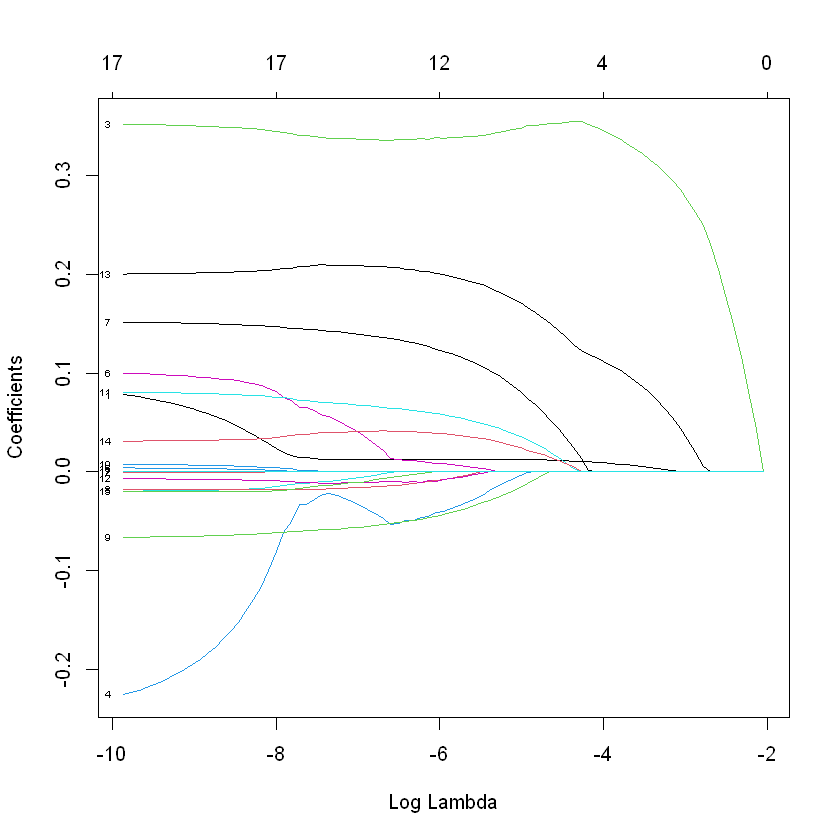

17 x 1 sparse Matrix of class "dgCMatrix"
                                 1
age                   0.0128859275
age_square            .           
male                  0.3384751090
TC_rcs_1             -0.0411706027
TC_rcs_2              .           
TC_rcs_3              0.0087604448
log_LDLC              0.1243984553
albuminuria_moderate -0.0087610076
albuminuria_severe   -0.0448266442
CKD_stage_G3a         .           
CKD_stage_G3b         0.0585773228
CKD_stage_G4         -0.0094954999
male_CKD_stage_G3a    0.2006637813
male_CKD_stage_G3b    0.0386464542
male_CKD_stage_G4     .           
age_TC                .           
age_BMI_TC            0.0000346535
Using Cox survival estimates at  365 Days


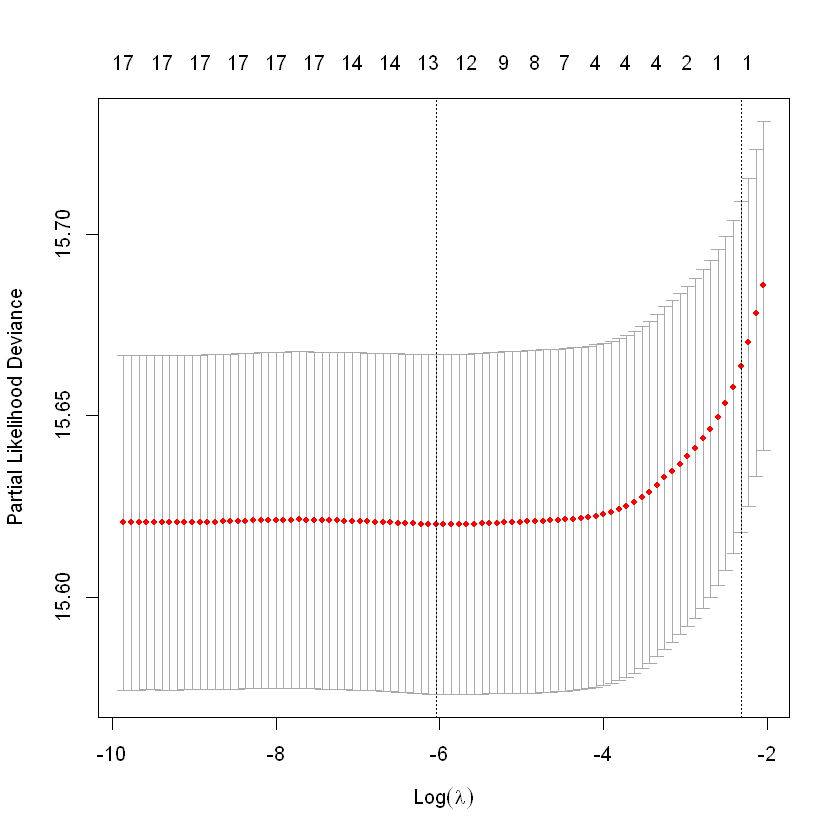

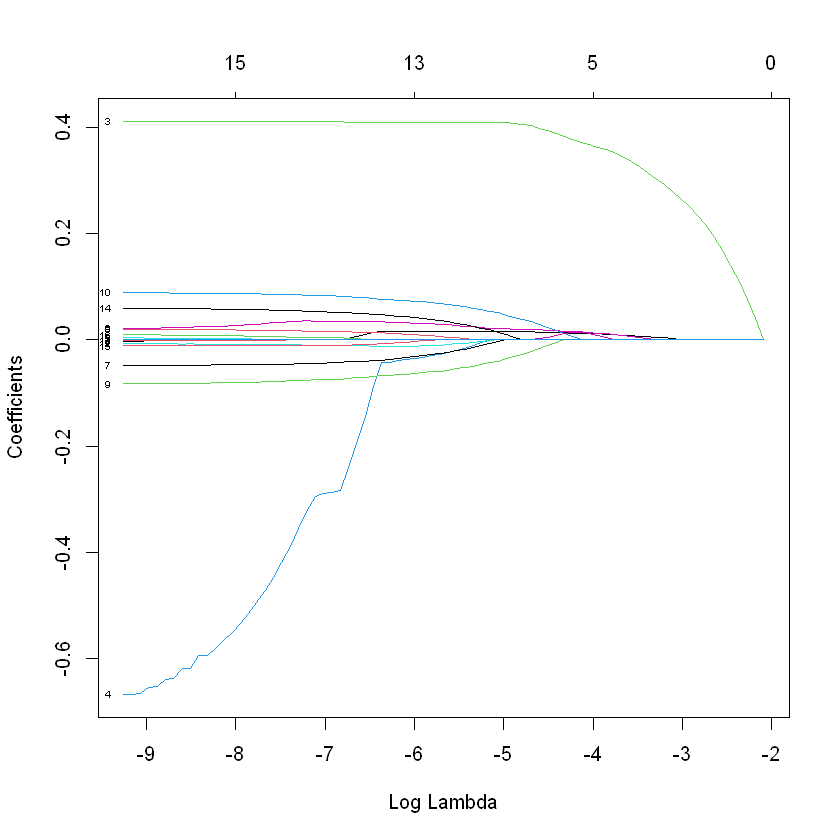

17 x 1 sparse Matrix of class "dgCMatrix"
                                 1
age                   .           
age_square           -4.567625e-07
male                  4.111183e-01
TC_rcs_1             -2.944912e-01
TC_rcs_2              1.269984e-04
TC_rcs_3              3.570427e-02
log_LDLC             -4.445412e-02
albuminuria_moderate  1.654524e-02
albuminuria_severe   -7.502837e-02
CKD_stage_G3a         8.401877e-02
CKD_stage_G3b         .           
CKD_stage_G4         -9.698842e-03
male_CKD_stage_G3a    2.331211e-04
male_CKD_stage_G3b    5.376126e-02
male_CKD_stage_G4    -1.083788e-02
age_TC                3.938731e-03
age_BMI_TC            3.164526e-05
Using Cox survival estimates at  365 Days


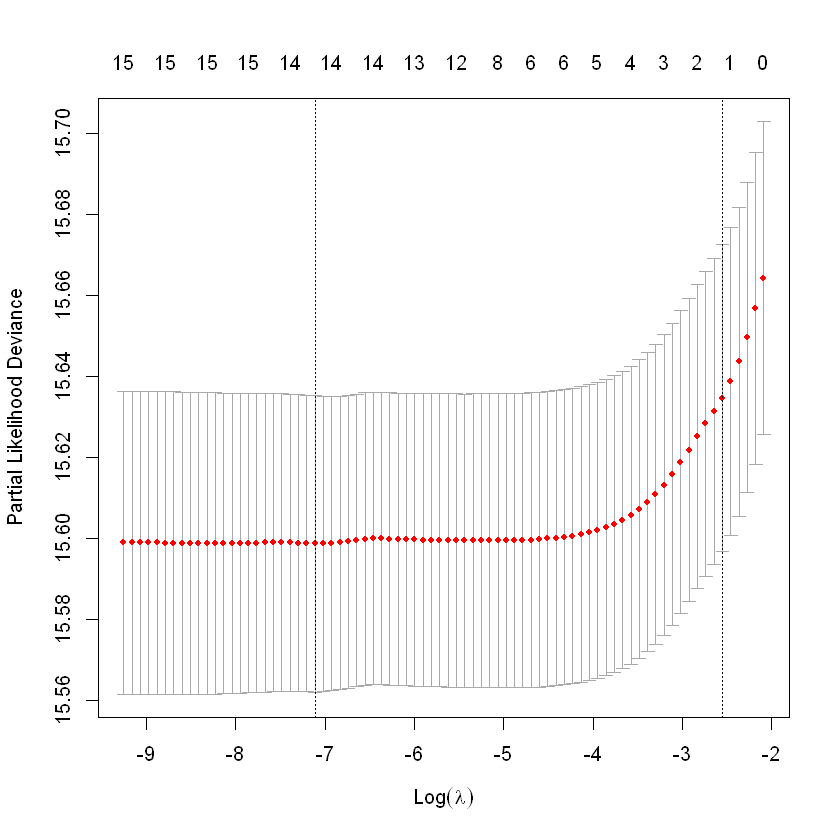

In [4]:
## Bootstrap法抽取内部验证的训练集
set.seed(123)
bootstrap_samples <- list()
results <- data.frame()
cal <- data.frame()
N <- 2 # number of bootstrapping
for (i in 1:N) {
  bootstrap_sample <- dataset[sample(nrow(dataset), replace = TRUE), ]
  bootstrap_samples[[i]] <- bootstrap_sample
  train_data <- bootstrap_samples[[i]]
  test_data <- dataset

  predictors <- c('age', 'age_square', 'male', # 'BMI', 'SBP',
                  # 'MI', 'HF', 'COPD', 'cancer', 'liver_disease', 'hypoglycemia',
                  'TC_rcs_1', 'TC_rcs_2', 'TC_rcs_3', 'log_LDLC',
                  'albuminuria_moderate', 'albuminuria_severe',
                  'CKD_stage_G3a', 'CKD_stage_G3b', 'CKD_stage_G4',
                  # 'No_outpatient', 'No_inpatient',
                  # 'age_male', 'male_cancer',
                  'male_CKD_stage_G3a', 'male_CKD_stage_G3b', 'male_CKD_stage_G4',
                  'age_TC', 'age_BMI_TC')

  # 在训练集上进行模型训练并筛选最优模型
  formula <- Lasso_survival(data=train_data, time="AKI_time", status="AKI_status", predictors = predictors, lambda = "min")

  # model refit
  survival_outcome <- Surv(train_data[,"AKI_time"], train_data[,"AKI_status"])
  train_model <- coxph(as.formula(formula), data=train_data)

    # 根据训练集所得的最优模型，在测试集上进行预测
  pre <- predict(train_model, newdata=test_data)

  # 在测试集上建立新模型并计算Harrell’s C统计量（全局区分度）
  test_model <- coxph(Surv(AKI_time, AKI_status) ~ pre, data=test_data)
  c_index1 <- round(summary(test_model)$concordance, 4)[1]

  # 在测试集上建立新模型并计算Time-dependent ROC(1 year)
  timeROC <- timeROC(T=test_data$AKI_time,
                  delta=test_data$AKI_status,
                  marker=pre,
                  cause=1, weighting="marginal",
                  times=1, # 可以输入要计算的年份向量
                  iid=TRUE)
  timeROC1 <- timeROC$AUC["t=1"]

  result <- data.frame(
      no = i,
      c_index = c_index1,
      timeROC = timeROC1
  )
  results <- rbind(results, result)

  # 1年期的校准曲线(调式)
  no_group <- 10
  m <- nrow(test_data) / no_group
  test_model1 <- cph(Surv(AKI_time*365, AKI_status) ~ pre, data=test_data, surv=T, x=T, y=T, time.inc=365)
  cal1 <- calibrate(test_model1, cmethod="KM", m=m, u=365)
  # time.inc和u要是一样的，都是要评价的时间节点，3年生存期为time.inc = 365*3，
  # m要根据样本量来确定，由于标准曲线一般将所有样本分为3组（在图中显示3个点），而m代表每组的样本量数，因此m=约为样本量/3
  # B代表最大再抽样的样本量（需要check一下）是用来计算resampleing calibration plot的，此处可以删掉。
  cal1 <- as.data.frame(cal1[,c("mean.predicted","KM", "std.err")]) %>% mutate(no = i) # std.err是怎么计算的？
  cal <- rbind(cal, cal1)
}

##### （1）Harrell's C统计量（全局区分度）

In [5]:
mean(results[,"c_index"])

[1] 0.5669

上述过程采用常规自助法（Bootstrap regular法）进行内部验证。自助抽样次数为2次，生成2个训练集，经2次LASSO回归筛选变量后拟合模型，在测试集上预测，计算的全局区分度Harrell's C统计量为0.5669，说明该方法所得模型的区分度一般。

##### （2）Time-dependent ROC (1 year) 时间依赖ROC曲线下面积AUC（1年）

In [6]:
mean(results[,"timeROC"])

[1] 0.5705785

经LASSO回归筛选变量后得到的模型，采用常规自助法（Bootstrap regular法）进行内部验证，自助抽样次数为2次，计算的1年内时间依赖曲线下面积AUC为0.570578506612，说明该方法所得模型的1年内时间依赖区分度一般。

##### （3）校准曲线

经LASSO回归筛选变量后得到的模型，采用常规自助法（Bootstrap regular法）进行内部验证，生成的校准曲线如下图所示。

该图横轴对应预测1年内生存概率，纵轴为实际生存概率，两条不同颜色的校准曲线代表2次自助抽样生成的两个训练集拟合模型后的预测结果，每条曲线有10个数据点代表所有预测样本的预测概率被划分为10份，各点的误差线代表实际观测概率的95%置信区间上下限。

图中校准曲线沿对角线紧密贴合，波动程度较小，说明该方法所得模型校准度较好。

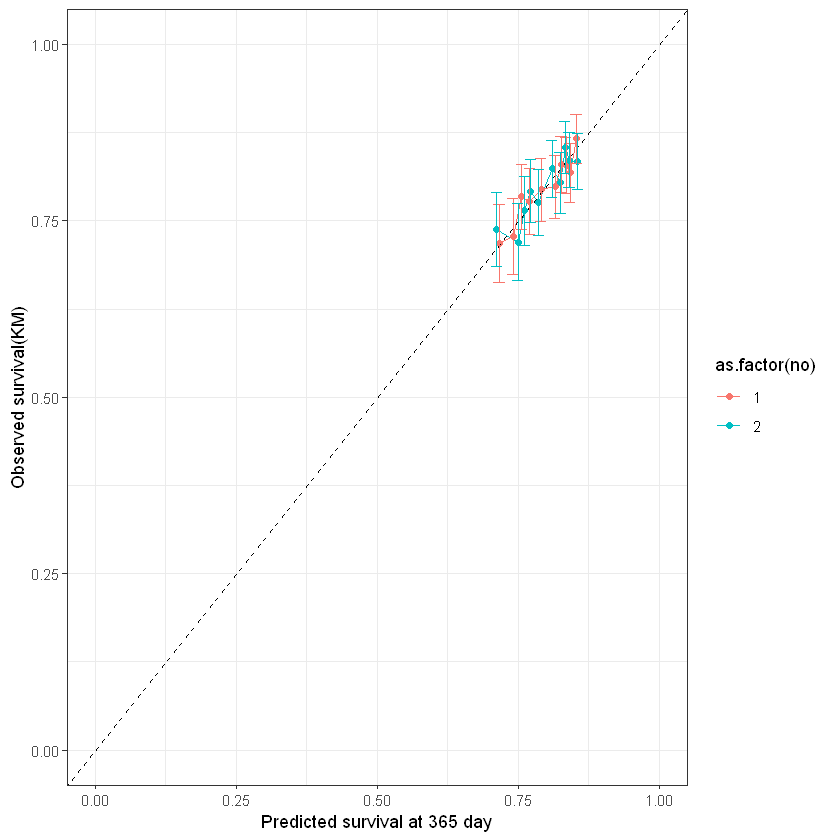

In [7]:
ggplot(cal, aes(x = mean.predicted, y = KM, group= as.factor(no), colour = as.factor(no))) +
    geom_line() +
    geom_point() +
    xlab("Predicted survival at 365 day") +
    ylab("Observed survival(KM)") +
    scale_x_continuous(limit=c(0,1)) +
    scale_y_continuous(limit=c(0,1)) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
    geom_errorbar(aes(ymax = (KM+1.96*std.err),ymin = (KM-1.96*std.err)), width=0.02) +
    theme_bw()

#### 3.1.1.2 增强自助法

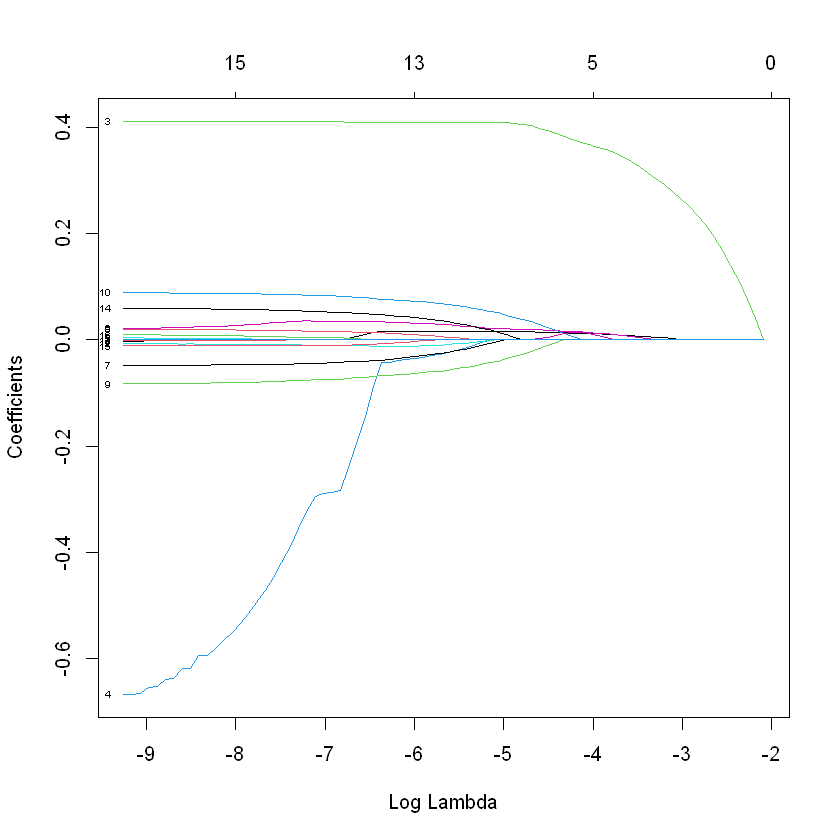

17 x 1 sparse Matrix of class "dgCMatrix"
                                 1
age                   .           
age_square           -4.567625e-07
male                  4.111183e-01
TC_rcs_1             -2.944912e-01
TC_rcs_2              1.269984e-04
TC_rcs_3              3.570427e-02
log_LDLC             -4.445412e-02
albuminuria_moderate  1.654524e-02
albuminuria_severe   -7.502837e-02
CKD_stage_G3a         8.401877e-02
CKD_stage_G3b         .           
CKD_stage_G4         -9.698842e-03
male_CKD_stage_G3a    2.331211e-04
male_CKD_stage_G3b    5.376126e-02
male_CKD_stage_G4    -1.083788e-02
age_TC                3.938731e-03
age_BMI_TC            3.164526e-05


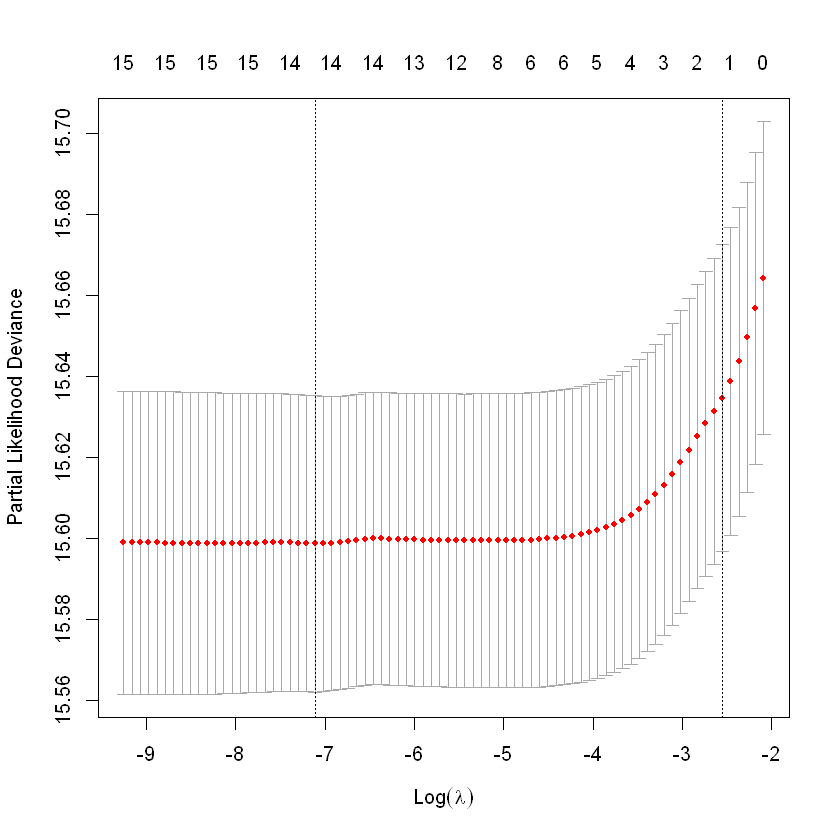

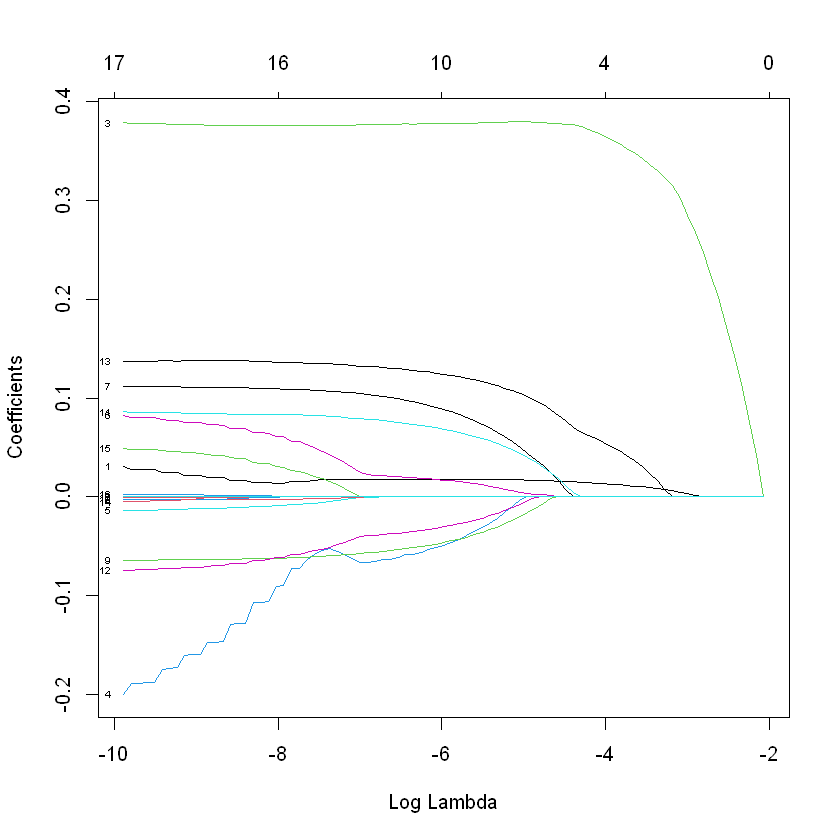

17 x 1 sparse Matrix of class "dgCMatrix"
                                 1
age                   1.747185e-02
age_square            .           
male                  3.773544e-01
TC_rcs_1             -4.271452e-02
TC_rcs_2              .           
TC_rcs_3              1.543897e-02
log_LDLC              8.345665e-02
albuminuria_moderate  .           
albuminuria_severe   -4.258056e-02
CKD_stage_G3a         .           
CKD_stage_G3b         6.533462e-02
CKD_stage_G4         -2.705591e-02
male_CKD_stage_G3a    1.214812e-01
male_CKD_stage_G3b    .           
male_CKD_stage_G4     .           
age_TC                .           
age_BMI_TC            3.046988e-05


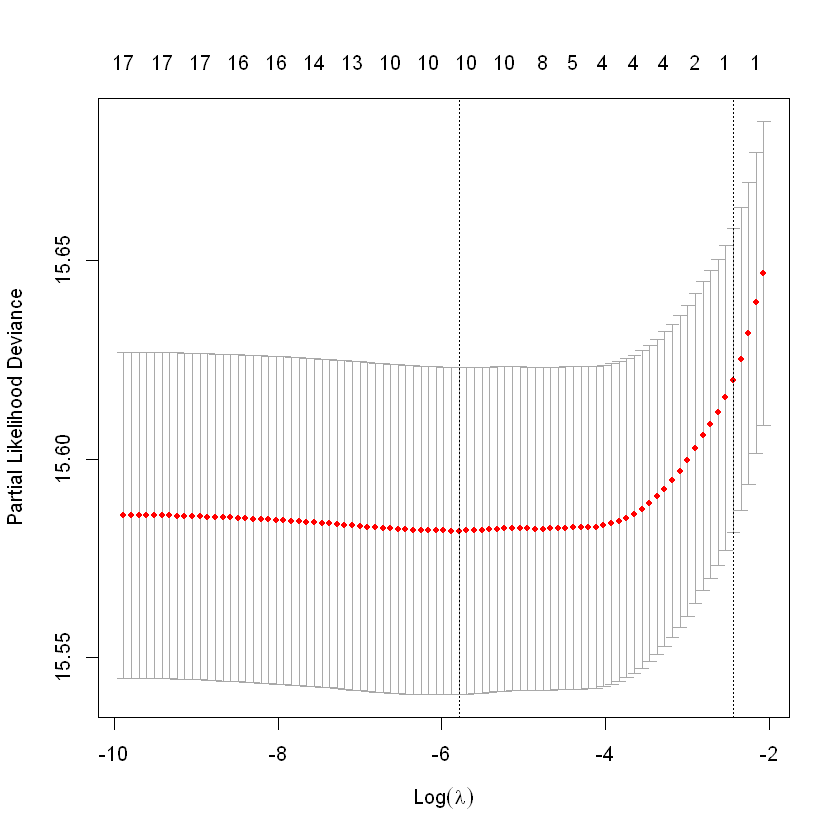

In [8]:
# 加强Bootstrap
N <- 2 # number of boot
results <- data.frame()
for (i in 1:N) {
  bootstrap_sample <- dataset[sample(nrow(dataset), replace = TRUE), ]
  bootstrap_samples[[i]] <- bootstrap_sample

  train_data <- bootstrap_samples[[i]]
  test_data <- dataset

  predictors <- c('age', 'age_square', 'male', # 'BMI', 'SBP',
                  # 'MI', 'HF', 'COPD', 'cancer', 'liver_disease', 'hypoglycemia',
                  'TC_rcs_1', 'TC_rcs_2', 'TC_rcs_3', 'log_LDLC',
                  'albuminuria_moderate', 'albuminuria_severe',
                  'CKD_stage_G3a', 'CKD_stage_G3b', 'CKD_stage_G4',
                  # 'No_outpatient', 'No_inpatient',
                  # 'age_male', 'male_cancer',
                  'male_CKD_stage_G3a', 'male_CKD_stage_G3b', 'male_CKD_stage_G4',
                  'age_TC', 'age_BMI_TC')

  # 在训练集上进行模型训练并筛选最优模型
  formula <- Lasso_survival(data=train_data, time="AKI_time", status="AKI_status", predictors = predictors, lambda = "min")

  # model refit
  survival_outcome <- Surv(train_data[,"AKI_time"], train_data[,"AKI_status"])
  train_model <- coxph(as.formula(formula), data=train_data)

  # 根据训练集所得的最优模型，在测试集上进行预测
  pre_train <- predict(train_model, newdata=train_data)
  pre_test <- predict(train_model, newdata=test_data)

  # 在训练集上计算Harrell’s C统计量（全局区分度）
  c_index0 <- round(summary(train_model)$concordance, 4)[1]

  # 在测试集上建立新模型并计算Harrell’s C统计量（全局区分度）
  test_model <- coxph(Surv(AKI_time, AKI_status) ~ pre_test, data=test_data)
  c_index1 <- round(summary(test_model)$concordance, 4)[1]


  # 在训练集上计算Time-dependent ROC(1 year)
  timeROC_train <- timeROC(train_data$AKI_time,
                     delta=train_data$AKI_status,
                     marker=pre_train,
                     cause=1, weighting="marginal",
                     times=1, # 可以输入要计算的年份向量
                     iid=TRUE)
  timeROC0 <- timeROC_train$AUC["t=1"]


  # 在测试集上建立新模型并计算Time-dependent ROC(1 year)
  timeROC <- timeROC(test_data$AKI_time,
                     delta=test_data$AKI_status,
                     marker=pre_test,
                     cause=1, weighting="marginal",
                     times=1, # 可以输入要计算的年份向量
                     iid=TRUE)
  timeROC1 <- timeROC$AUC["t=1"]

  result <- data.frame(
    no = i,
    c_index_train = c_index0,
    c_index = c_index1,
    timeROC_train = timeROC0,
    timeROC = timeROC1)

  results <- rbind(results, result)
}

##### （1）Harrell's C统计量（全局区分度）

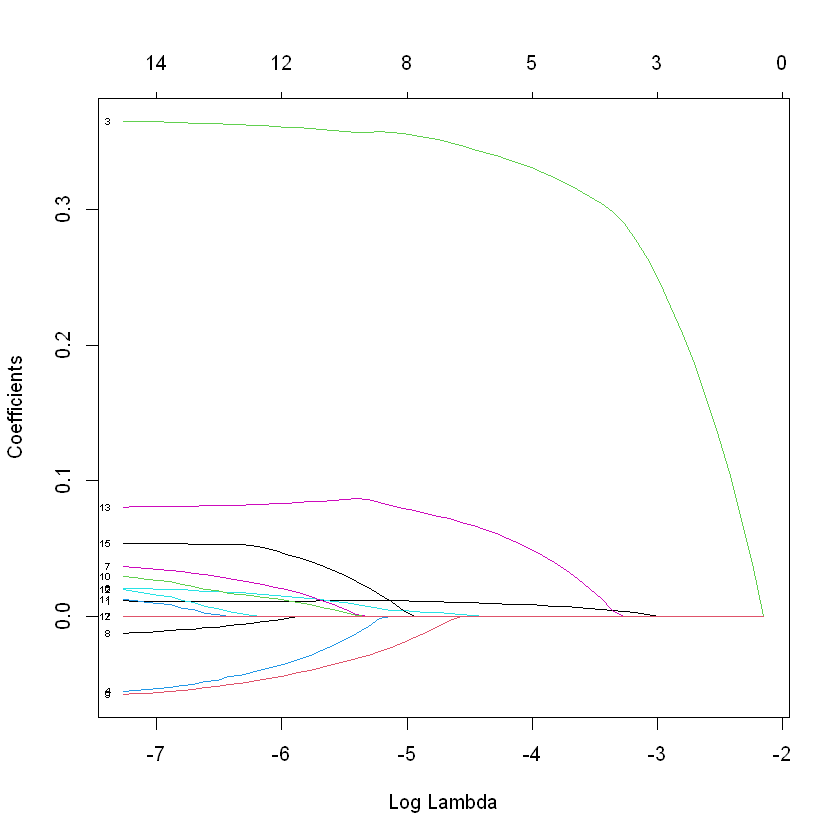

17 x 1 sparse Matrix of class "dgCMatrix"
                                1
age                  9.749135e-03
age_square           2.400645e-05
male                 3.422981e-01
TC_rcs_1             .           
TC_rcs_2             .           
TC_rcs_3             .           
log_LDLC             .           
albuminuria_moderate .           
albuminuria_severe   .           
CKD_stage_G3a        .           
CKD_stage_G3b        .           
CKD_stage_G4         .           
male_CKD_stage_G3a   6.399917e-02
male_CKD_stage_G3b   .           
male_CKD_stage_G4    .           
age_TC               .           
age_BMI_TC           1.899753e-05


C 
0.5609

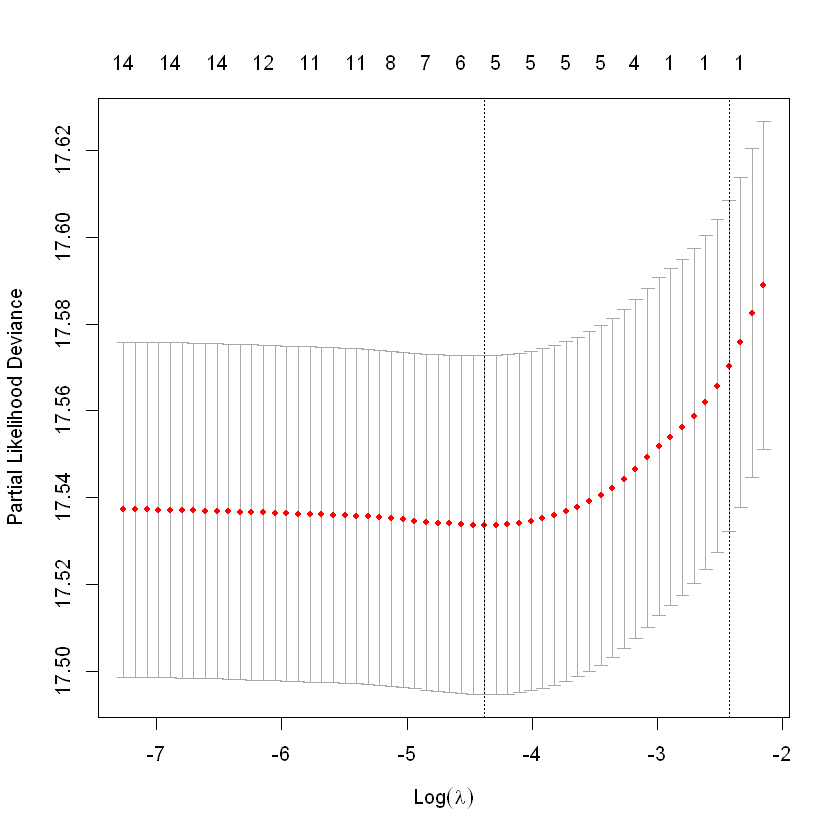

In [9]:
# 在原始数据集上进行模型训练并筛选最优模型
formula <- Lasso_survival(data=dataset, time="AKI_time", status="AKI_status", predictors = predictors, lambda = "min")

# model refit
survival_outcome <- Surv(dataset[,"AKI_time"], dataset[,"AKI_status"])
train_model <- coxph(as.formula(formula), data=dataset)

# 根据原始数据集所得的最优模型，在原始数据集上进行预测
pre <- predict(train_model)

# 在原始数据集上计算Harrell’s C统计量（全局区分度）
c_index_apparent <- round(summary(train_model)$concordance, 4)[1]

optimisim_C_index <- mean(results$c_index_train)-mean(results$c_index)

c_index_apparent-optimisim_C_index

上述过程采用增强自助法（增强bootstrap法）进行内部验证。

自助抽样次数为2次，抽样得到的训练集经LASSO回归筛选变量后重新拟合得到的模型分别在训练集与测试集上进行预测，分别计算C统计量的表面表现（apparent performance）与测试表现（test performance）的平均值，相减得到C统计量的平均高估值（optimism）。最后再利用原始数据集经LASSO回归筛选变量后重新拟合，得到模型后在原始数据集进行预测，计算得到Harrell’s C统计量，将其减去平均高估值，得到经过调整的全局区分度Harrell’s C统计量为0.5609。说明该方法所得模型的区分度一般。

##### （2）Time-dependent ROC (1 year)（时间依赖曲线：1年）

In [10]:
# 根据原始数据集所得的最优模型，在原始数据集上进行预测
timeROC_origin <- timeROC(dataset$AKI_time,
                    delta=dataset$AKI_status,
                    marker=pre,
                    cause=1, weighting="marginal",
                    times=1, # 可以输入要计算的年份向量
                    iid=TRUE)

timeROC_apparent <- timeROC_origin$AUC["t=1"]

optimisim_timeROC <- mean(results$timeROC_train)-mean(results$timeROC)
timeROC_apparent-optimisim_timeROC

t=1 
0.5693191

上述过程采用增强自助法（增强bootstrap法）进行内部验证。

自助抽样次数为2次，抽样得到的训练集经LASSO回归筛选变量后重新拟合得到的模型分别在训练集与测试集上进行预测，分别计算1年内时间依赖曲线下面积AUC的表面表现（apparent performance）与测试表现（test performance）的平均值，相减得到其平均高估值（optimism）。最后再利用原始数据集经LASSO回归筛选变量后重新拟合，得到模型后在原始数据集进行预测，计算得到1年时间依赖曲线下面积AUC，将其减去平均高估值，得到经过调整的1年内时间依赖曲线下面积AUC为0.5693。说明该方法所得模型的1年内时间依赖区分度一般。

### 3.1.2 交叉验证法

#### 3.1.2.1 随机拆分验证

In [11]:
# 将数据集进行拆分（例子：80％用于训练cox回归模型，20％用于评估模型性能）
set.seed(123)
training_samples <- dataset$ID %>% createDataPartition(p = 0.8, list = FALSE) # caret包中的createDataPartition函数可以用来做数据集划分
train_data <- dataset[training_samples, ]
test_data <- dataset[-training_samples, ]

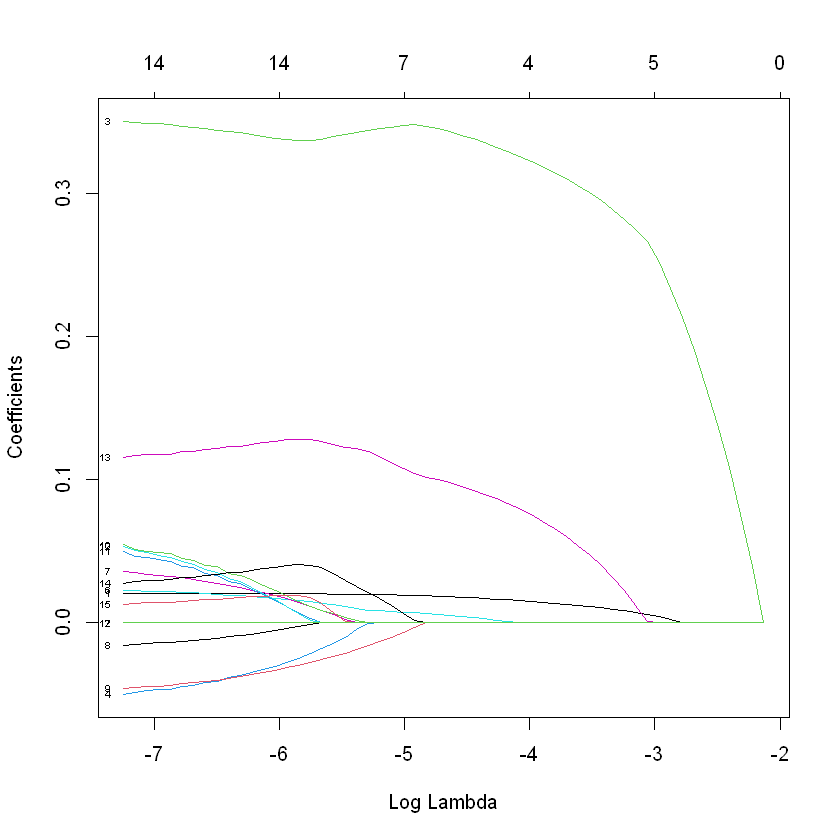

17 x 1 sparse Matrix of class "dgCMatrix"
                                1
age                  1.838840e-02
age_square           .           
male                 3.433094e-01
TC_rcs_1             .           
TC_rcs_2             .           
TC_rcs_3             5.220364e-03
log_LDLC             .           
albuminuria_moderate .           
albuminuria_severe   .           
CKD_stage_G3a        .           
CKD_stage_G3b        .           
CKD_stage_G4         .           
male_CKD_stage_G3a   9.784495e-02
male_CKD_stage_G3b   .           
male_CKD_stage_G4    .           
age_TC               .           
age_BMI_TC           2.080157e-05


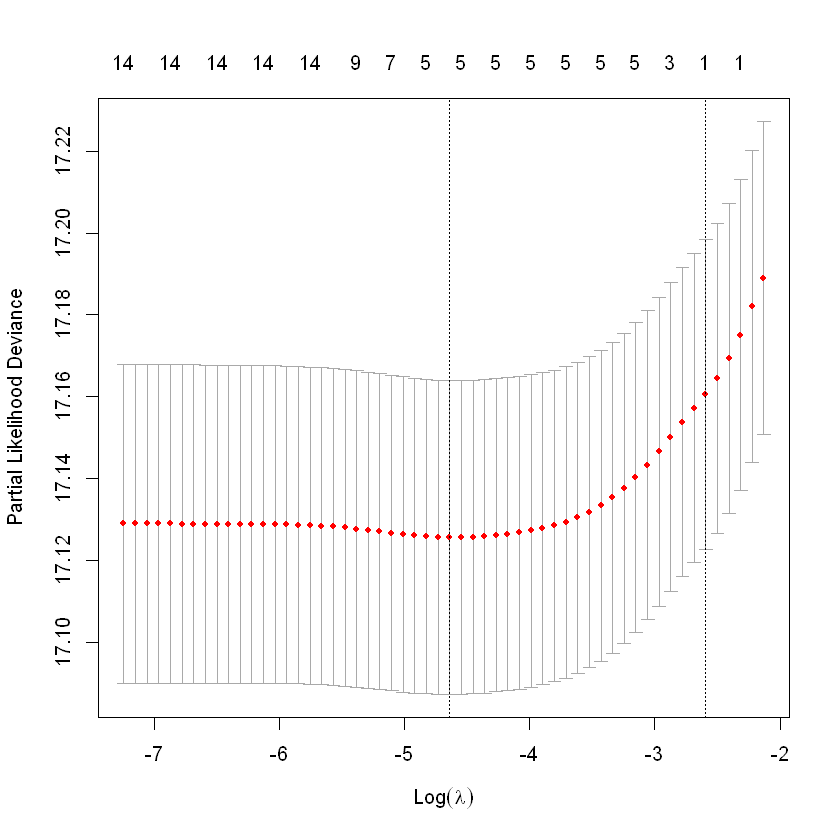

In [12]:
# 采用Lasso回归筛选法，在训练集上进行模型训练
predictors <- c('age', 'age_square', 'male', # 'BMI', 'SBP',
                # 'MI', 'HF', 'COPD', 'cancer', 'liver_disease', 'hypoglycemia',
                'TC_rcs_1', 'TC_rcs_2', 'TC_rcs_3', 'log_LDLC',
                'albuminuria_moderate', 'albuminuria_severe',
                'CKD_stage_G3a', 'CKD_stage_G3b', 'CKD_stage_G4',
                # 'No_outpatient', 'No_inpatient',
                # 'age_male', 'male_cancer',
                'male_CKD_stage_G3a', 'male_CKD_stage_G3b', 'male_CKD_stage_G4',
                'age_TC', 'age_BMI_TC')

formula <- Lasso_survival(data=train_data, time="AKI_time", status="AKI_status", predictors = predictors, lambda = "min")

# model refit
survival_outcome <- Surv(train_data[,"AKI_time"], train_data[,"AKI_status"])
train_model <- coxph(as.formula(formula), data=train_data)

# 根据训练集所得的最优模型，在测试集上进行预测
pre <- predict(train_model, newdata=test_data)

##### （1）Harrell’s C统计量（全局区分度）

In [13]:
# 在测试集上建立新模型并计算区分度和校准度
test_model1 <- coxph(Surv(AKI_time, AKI_status) ~ pre, data=test_data)
sum <- summary(test_model1)
c_index <- round(sum$concordance,4)
c_index

C  se(C) 
0.5435 0.0136

上述过程采用交叉验证法（随机拆分验证法）进行内部验证，抽取80%样本作为训练集，剩余20%样本为测试集，最终，经LASSO回归筛选变量后得到的模型，计算的全局区分度Harrell’s C统计量为0.5435，其标准误为0.0136，说明区分度一般。

##### （2）Time-dependent ROC (1 year)（时间依赖曲线：1年）

In [14]:
timeROC <- timeROC(T=test_data$AKI_time,
                    delta=test_data$AKI_status,
                    marker=pre,
                    cause=1, weighting="marginal",
                    times=1,
                    iid=TRUE)
timeROC1 <- timeROC$AUC["t=1"]
timeROC1

t=1 
0.5407693

上述过程采用交叉验证法（随机拆分验证法）进行内部验证，抽取80%样本作为训练集，剩余20%样本为测试集，最终，经LASSO回归筛选变量后得到的模型，计算的1年时间依赖曲线下面积AUC为0.5408，说明其1年时间依赖区分度一般。

##### （3）校准曲线

Using Cox survival estimates at  365 Days
Using Cox survival estimates at  730 Days


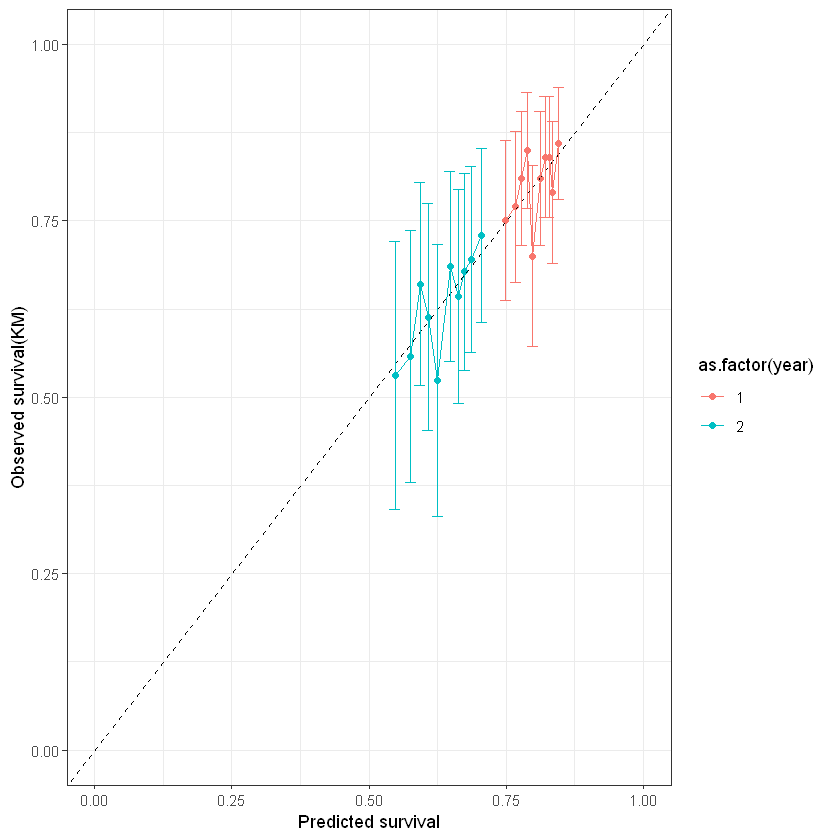

In [15]:
no_group <- 10
m <- nrow(test_data) / no_group

# 1年生存期校准曲线
test_model1 <- cph(Surv(AKI_time*365, AKI_status) ~ pre, data=test_data, surv=T, x=T, y=T, time.inc=365)
options(warn = -1)
cal1 <- calibrate(test_model1, cmethod="KM", m=m, u=365)

# 2年生存期校准曲线
test_model2 <- cph(Surv(AKI_time*365, AKI_status) ~ pre, data=test_data, surv=T, x=T, y=T, time.inc=365*2)
options(warn = -1)
cal2 <- calibrate(test_model2, cmethod="KM", m=m, u=365*2)

cal1 <- as.data.frame(cal1[,c("mean.predicted","KM", "std.err")]) %>% mutate(year = 1)
cal2 <- as.data.frame(cal2[,c("mean.predicted","KM", "std.err")]) %>% mutate(year = 2)
cal <- rbind(cal1, cal2)

ggplot(cal, aes(x = mean.predicted, y = KM, group= as.factor(year), colour = as.factor(year))) +
    geom_line() +
    geom_point() +
    xlab("Predicted survival") +
    ylab("Observed survival(KM)") +
    scale_x_continuous(limit=c(0,1)) +
    scale_y_continuous(limit=c(0,1)) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
    geom_errorbar(aes(ymax = (KM+1.96*std.err),ymin = (KM-1.96*std.err)), width=0.02) +
    theme_bw()

经LASSO回归筛选变量后得到的模型，采用交叉验证法（随机拆分验证法）进行内部验证，生成的校准曲线如下图所示。

该图横轴对应预测生存概率，纵轴为实际生存概率，两条校准曲线的不同颜色代表1年与2年的生存期，每条曲线有10个数据点代表所有预测样本的预测概率被划分为10份，各点的误差线代表实际观测概率的95%置信区间上下限。

图中校准曲线沿对角线紧密贴合，波动程度较小，说明该方法所得模型校准度较好。

#### 3.1.2.2 K折交叉验证（K-fold Cross Validation）（更为推荐）

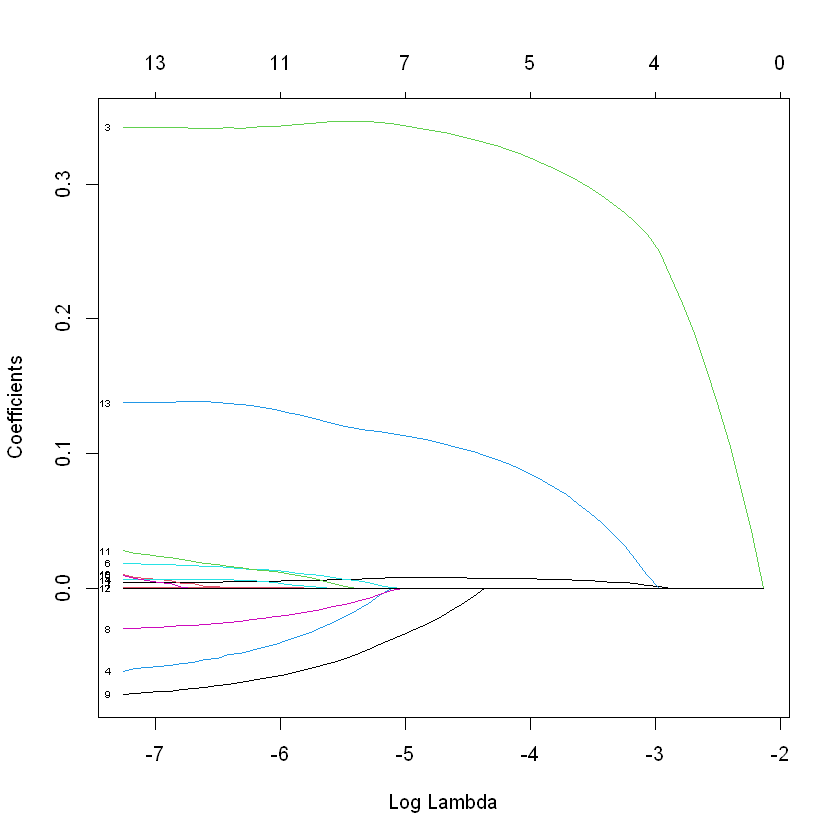

17 x 1 sparse Matrix of class "dgCMatrix"
                                 1
age                   7.641099e-03
age_square            6.387986e-05
male                  3.392898e-01
TC_rcs_1              .           
TC_rcs_2              .           
TC_rcs_3              .           
log_LDLC              .           
albuminuria_moderate  .           
albuminuria_severe   -2.224449e-02
CKD_stage_G3a         .           
CKD_stage_G3b         .           
CKD_stage_G4          .           
male_CKD_stage_G3a    1.082306e-01
male_CKD_stage_G3b    .           
male_CKD_stage_G4     .           
age_TC                .           
age_BMI_TC            2.032194e-05
Using Cox survival estimates at  365 Days


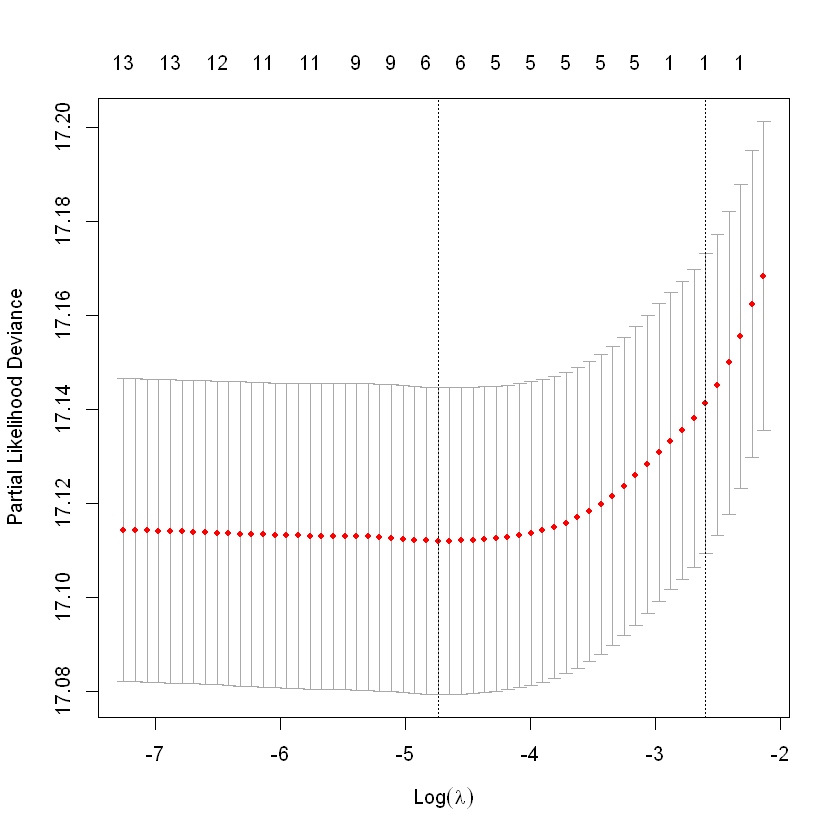

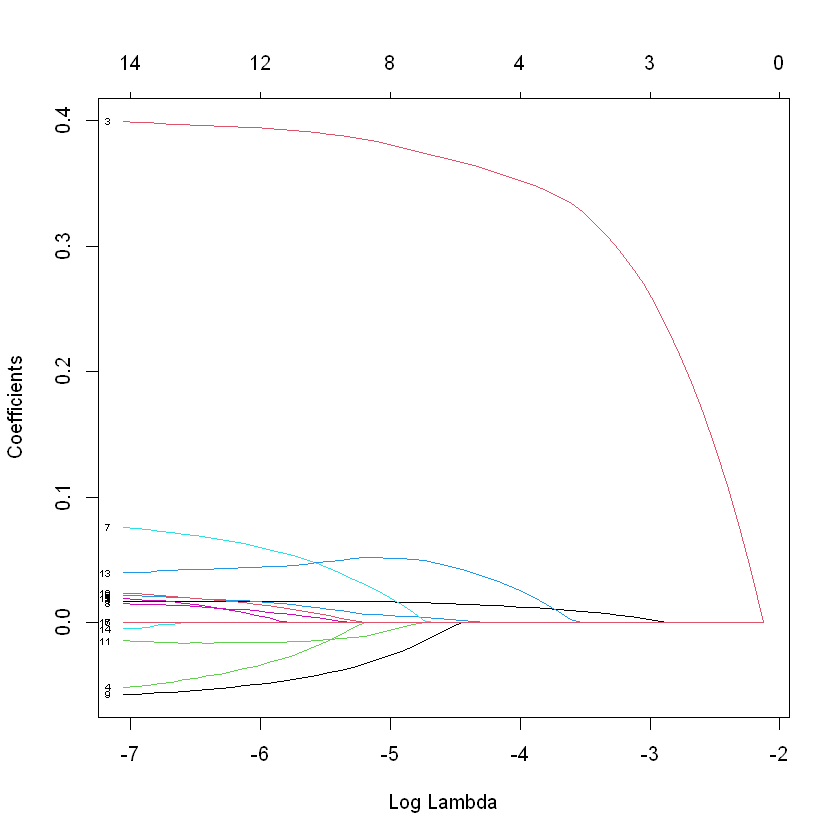

17 x 1 sparse Matrix of class "dgCMatrix"
                                1
age                  1.388939e-02
age_square           .           
male                 3.611361e-01
TC_rcs_1             .           
TC_rcs_2             .           
TC_rcs_3             1.240854e-04
log_LDLC             .           
albuminuria_moderate .           
albuminuria_severe   .           
CKD_stage_G3a        .           
CKD_stage_G3b        .           
CKD_stage_G4         .           
male_CKD_stage_G3a   3.627089e-02
male_CKD_stage_G3b   .           
male_CKD_stage_G4    .           
age_TC               .           
age_BMI_TC           2.025188e-05
Using Cox survival estimates at  365 Days


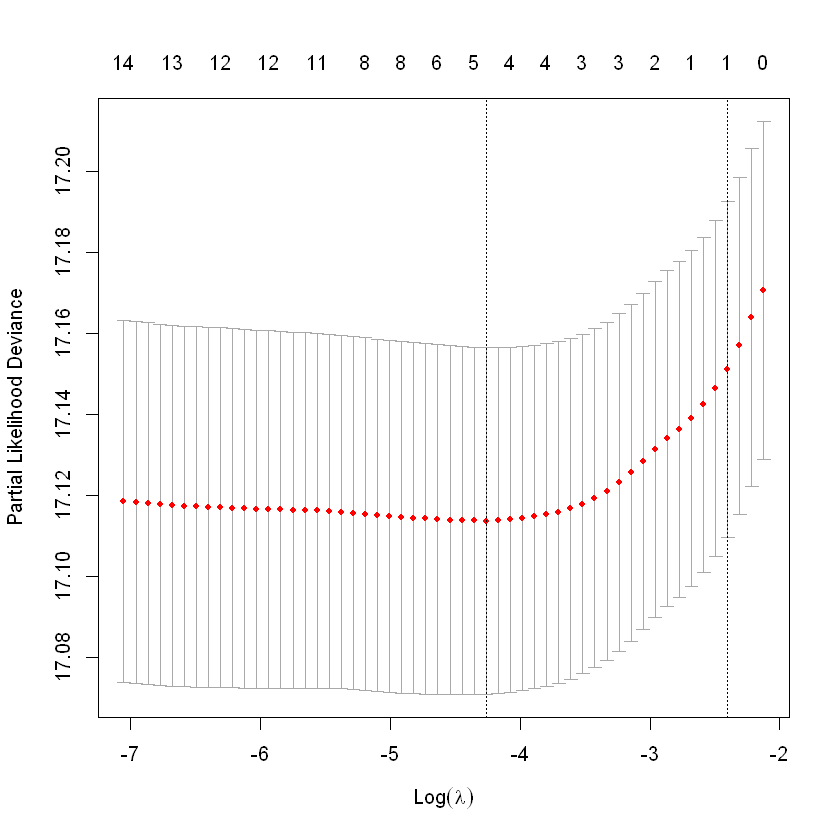

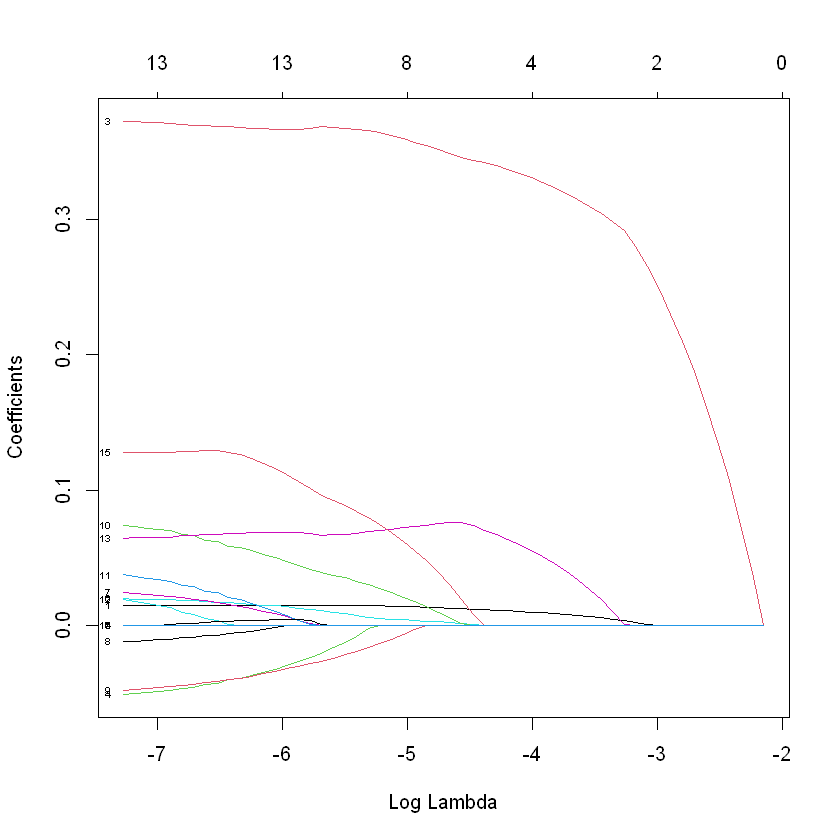

17 x 1 sparse Matrix of class "dgCMatrix"
                                1
age                  0.0118560305
age_square           .           
male                 0.3419100489
TC_rcs_1             .           
TC_rcs_2             .           
TC_rcs_3             .           
log_LDLC             .           
albuminuria_moderate .           
albuminuria_severe   .           
CKD_stage_G3a        .           
CKD_stage_G3b        .           
CKD_stage_G4         .           
male_CKD_stage_G3a   0.0704716284
male_CKD_stage_G3b   .           
male_CKD_stage_G4    .           
age_TC               .           
age_BMI_TC           0.0000181621
Using Cox survival estimates at  365 Days


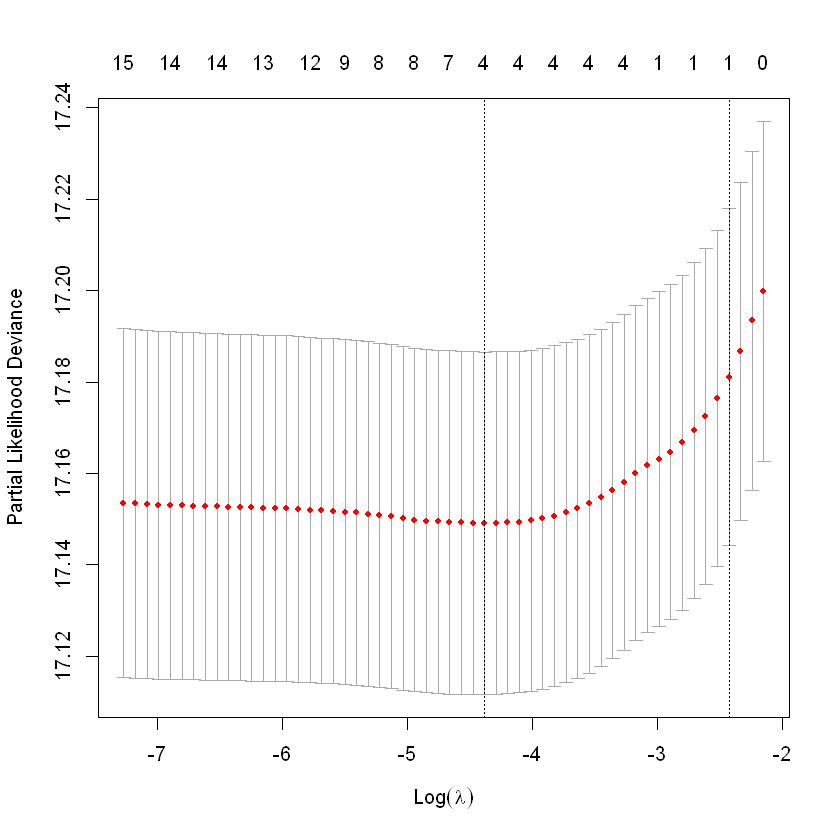

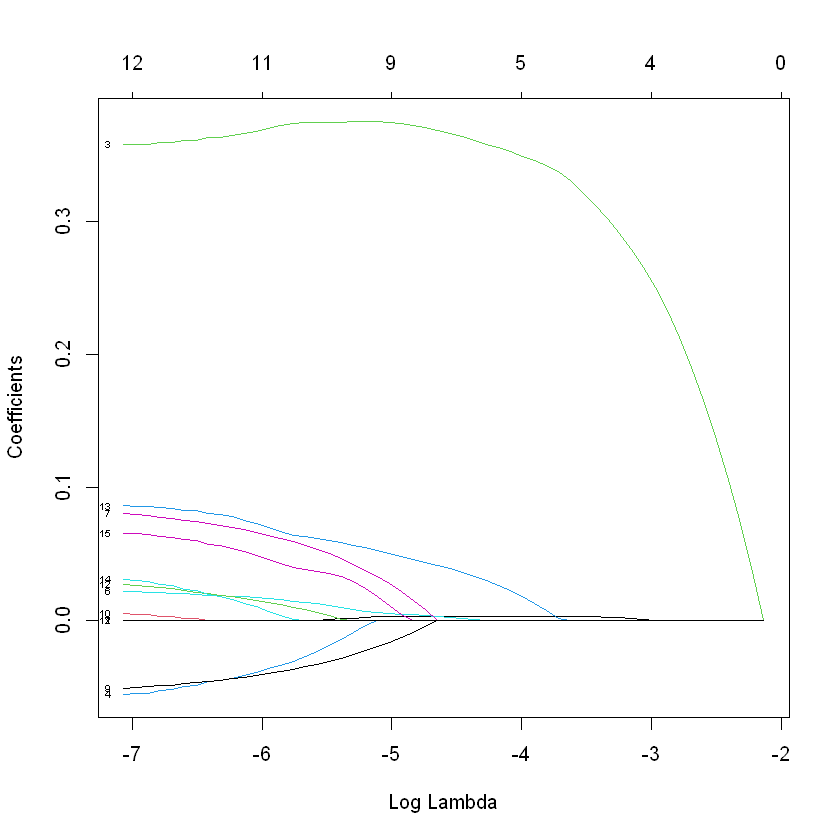

17 x 1 sparse Matrix of class "dgCMatrix"
                                1
age                  3.127026e-03
age_square           6.678618e-05
male                 3.521719e-01
TC_rcs_1             .           
TC_rcs_2             .           
TC_rcs_3             .           
log_LDLC             .           
albuminuria_moderate .           
albuminuria_severe   .           
CKD_stage_G3a        .           
CKD_stage_G3b        .           
CKD_stage_G4         .           
male_CKD_stage_G3a   2.208325e-02
male_CKD_stage_G3b   .           
male_CKD_stage_G4    .           
age_TC               .           
age_BMI_TC           2.210484e-05
Using Cox survival estimates at  365 Days


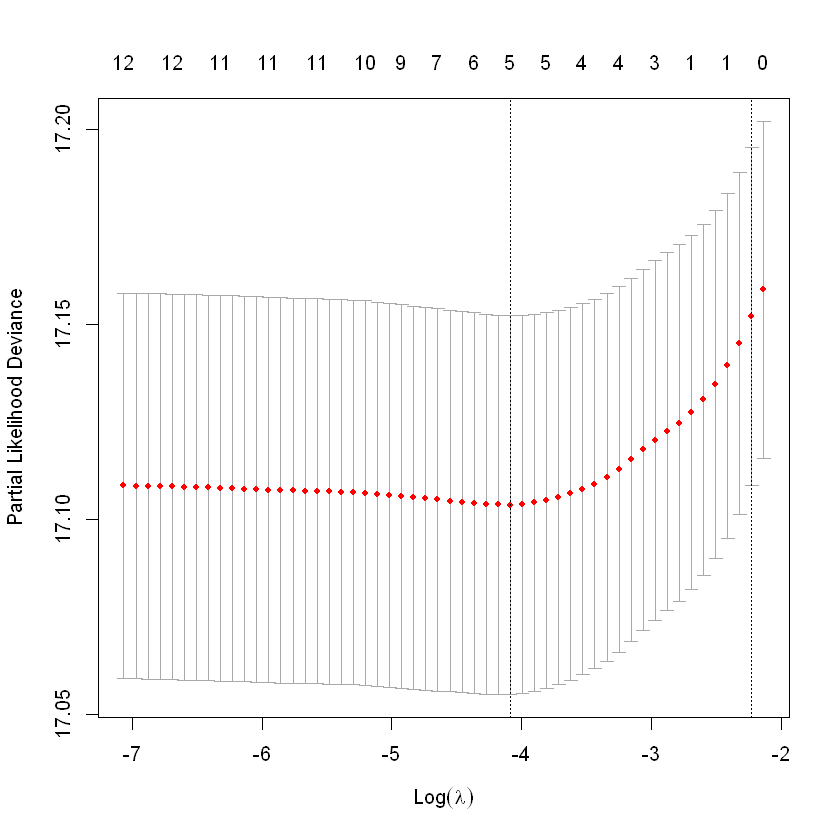

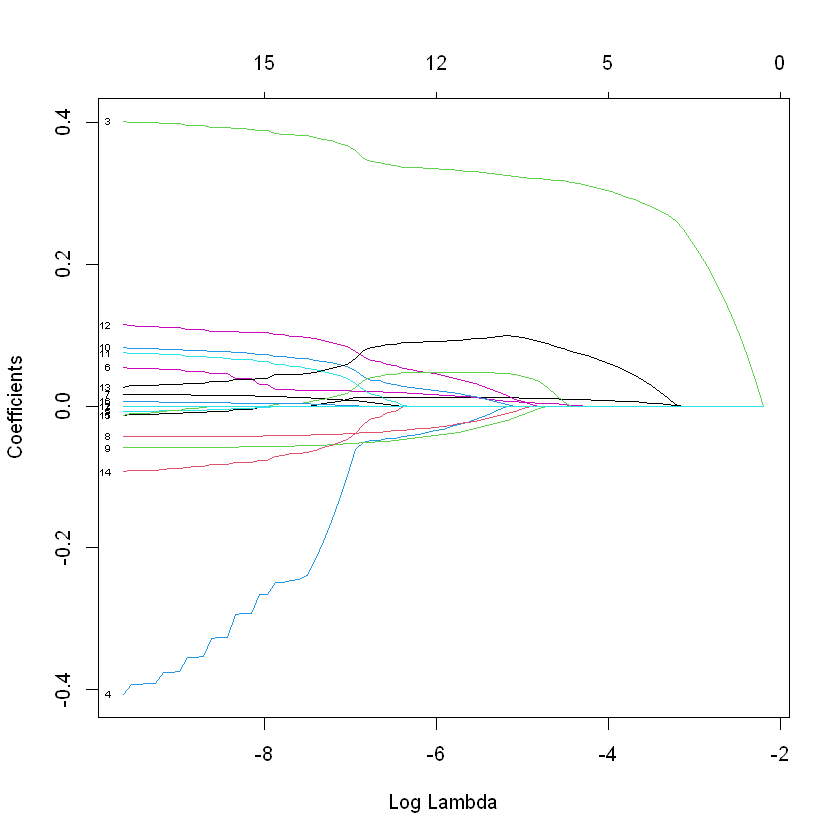

17 x 1 sparse Matrix of class "dgCMatrix"
                                1
age                  8.801599e-03
age_square           7.134348e-06
male                 3.108514e-01
TC_rcs_1             .           
TC_rcs_2             .           
TC_rcs_3             .           
log_LDLC             .           
albuminuria_moderate .           
albuminuria_severe   .           
CKD_stage_G3a        .           
CKD_stage_G3b        .           
CKD_stage_G4         .           
male_CKD_stage_G3a   7.110530e-02
male_CKD_stage_G3b   .           
male_CKD_stage_G4    .           
age_TC               .           
age_BMI_TC           1.208984e-05
Using Cox survival estimates at  365 Days


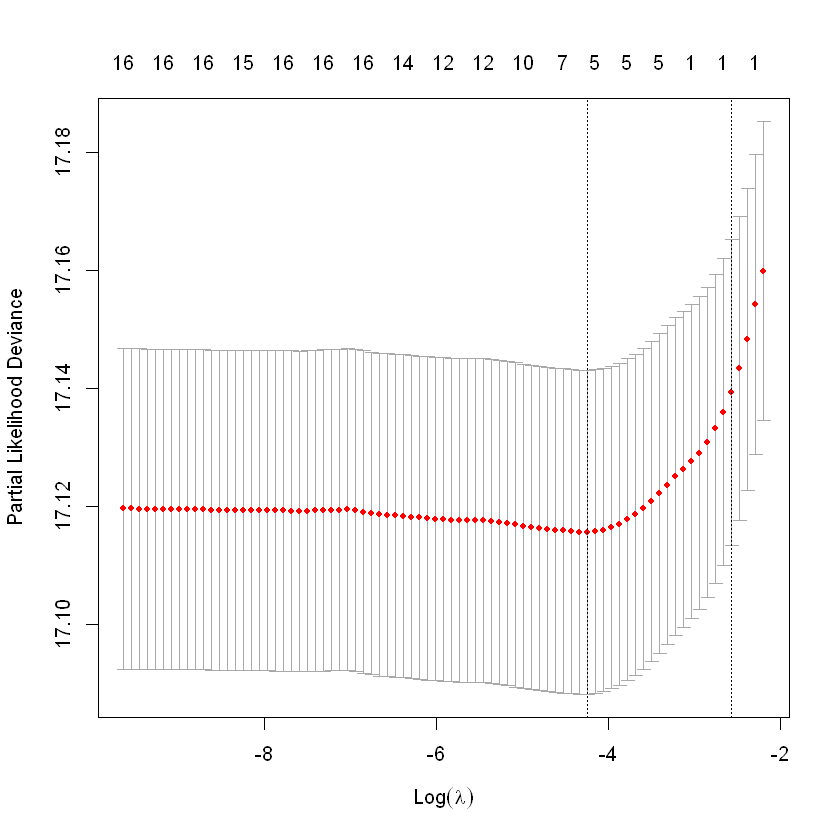

In [16]:
folds <- createFolds(y=Surv(dataset$AKI_time, dataset$AKI_status), k=5)
results <- data.frame()
cal <- data.frame()

for(i in 1:5){
    train_data <- dataset[-folds[[i]],]
    test_data <- dataset[folds[[i]],]
    x <- data.matrix(train_data[c('age', 'age_square', 'male', # 'BMI', 'SBP',
                # 'MI', 'HF', 'COPD', 'cancer', 'liver_disease', 'hypoglycemia',
                'TC_rcs_1', 'TC_rcs_2', 'TC_rcs_3', 'log_LDLC',
                'albuminuria_moderate', 'albuminuria_severe',
                'CKD_stage_G3a', 'CKD_stage_G3b', 'CKD_stage_G4',
                # 'No_outpatient', 'No_inpatient',
                # 'age_male', 'male_cancer',
                'male_CKD_stage_G3a', 'male_CKD_stage_G3b', 'male_CKD_stage_G4',
                'age_TC', 'age_BMI_TC')] )

    # 在训练集上进行模型训练并筛选最优模型
    formula <- Lasso_survival(data=train_data, time="AKI_time", status="AKI_status", predictors = predictors, lambda = "min")

    # model refit
    survival_outcome <- Surv(train_data[,"AKI_time"], train_data[,"AKI_status"])
    train_model <- coxph(as.formula(formula), data=train_data)

    # 根据训练集所得的最优模型，在测试集上进行预测
    pre <- predict(train_model, newdata=test_data)

    # 在测试集上建立新模型并计算Harrell’s C统计量（全局区分度）
    test_model <- coxph(Surv(AKI_time, AKI_status) ~ pre, data=test_data)
    c_index1 <- round(summary(test_model)$concordance, 4)[1]

    # 在测试集上建立新模型并计算Time-dependent ROC
    timeROC <- timeROC(T=test_data$AKI_time,
                    delta=test_data$AKI_status,
                    marker=pre,
                    cause=1, weighting="marginal",
                    times=1,
                    iid=TRUE)
    timeROC1 <- timeROC$AUC["t=1"]

    result <- data.frame(
        no = i,
        c_index = c_index1,
        timeROC = timeROC1
    )
    results <- rbind(results, result)

    # 在测试集上建立1年期的校准曲线
    no_group <- 10
    m <- nrow(test_data) / no_group
    test_model1 <- cph(Surv(AKI_time*365, AKI_status) ~ pre, data=test_data, surv=T, x=T, y=T, time.inc=365)
    cal1 <- calibrate(test_model1, cmethod="KM", m=m, u=365)
    cal1 <- as.data.frame(cal1[,c("mean.predicted","KM", "std.err")]) %>% mutate(no = i)
    cal <- rbind(cal, cal1)
}

##### （1）Harrell’s C统计量（全局区分度）

In [17]:
mean(results[,"c_index"])

[1] 0.56754

上述过程采用交叉验证法（5折交叉验证）进行内部验证，原数据集被拆为5个子集，轮流作为测试集与其他情况下的训练集，经5次LASSO回归筛选变量后拟合模型，计算的平均全局区分度Harrell’s C统计量为0.56754，说明区分度一般。

##### （2）Time-dependent ROC (1 year) 时间依赖曲线：1年

In [18]:
mean(results[,"timeROC"])

[1] 0.5714765

上述过程采用交叉验证法（5折交叉验证）进行内部验证，原数据集被拆为5个子集，轮流作为测试集与其他情况下的训练集，经5次LASSO回归筛选变量后拟合模型，计算的平均1年时间依赖曲线下面积AUC为0.57148，说明其1年时间依赖区分度一般。

##### （3）校准曲线

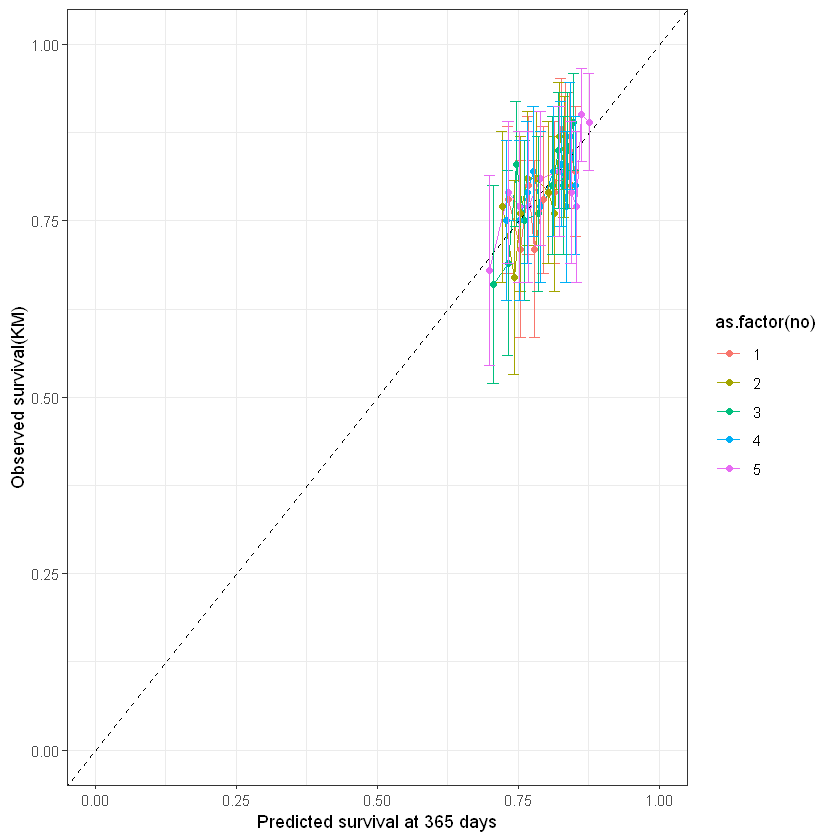

In [19]:
ggplot(cal, aes(x = mean.predicted, y = KM, group= as.factor(no), colour = as.factor(no))) +
    geom_line() +
    geom_point() +
    xlab("Predicted survival at 365 days") +
    ylab("Observed survival(KM)") +
    scale_x_continuous(limit=c(0,1)) +
    scale_y_continuous(limit=c(0,1)) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
    geom_errorbar(aes(ymax = (KM+1.96*std.err),ymin = (KM-1.96*std.err)), width=0.02) +
    theme_bw()

经LASSO回归筛选变量后得到的模型，采用交叉验证法（5折交叉验证）进行内部验证，生成的校准曲线如上图所示。

该图横轴对应预测1年生存概率，纵轴为实际生存概率，5条不同颜色的校准曲线代表拆分成的5个子集轮流作为测试集与训练集之一、经5次拟合模型后的预测结果，每条曲线有10个数据点代表所有预测样本的预测概率划分为10份，各点的误差线代表实际观测概率的95%置信区间上下限。

图中所有校准曲线沿对角线紧密贴合，波动程度较小，说明该方法所得模型校准度较好。

## 3.2 外部验证

### 3.2.1 应用其他文章的模型

$$ S(t) = S_0(t)^{exp(\beta X)} $$

In [20]:
# 根据别人文中的模型，根据已经计算的S0(t), 预测S(t)
pre_S <- function (S0, beta, predictors, data) {
    design_matrix <- as.matrix(data[,predictors])
    score <-  design_matrix %*% as.matrix(beta)
    pre_S <- S0^exp(score)
    return(pre_S)
}

In [21]:
beta <- coef(train_model_lasso_refit)
predictors <- names(beta)

$$ h(t) = h_0(t)exp(\beta X) $$
$$ \Lambda(t) = \int_{0}^{t} h(u) du $$
$$ S(t) =  exp(-\Lambda(t)) $$
$$ S(t) = S_0(t)^{exp(\beta X)} $$
$$ \hat{h}_0(t) = \frac{d_t}{exp(\hat{\beta} X)} $$
$d_t$: number of deaths during time $t$.
$$ \hat{\Lambda}_0(t) = \sum_{j:t_j<t} \hat{h}_0(t_j) $$

$$ \hat{S}_0(t) = exp(-\hat{\Lambda}_0(t))$$
$$ \hat{S}(t) = \hat{S}_0(t)^{exp(\hat{\beta} X)} $$

In [22]:
# 自己计算S0
pre_S <- function (S0, beta, predictors, data, time, status, t) {
    design_matrix <- as.matrix(data[,predictors])
    score <-  design_matrix %*% as.matrix(beta)
    h0 <- list()
    cum_h0 <- list()

    followup <- unique(data[,time])
    followup <- sort(followup)
    N <- length(followup)

    for(i in 1:N){
        d <- sum((dataset_external[,time] >= followup[i] & dataset_external[,time] < followup[i+1]) & dataset_external[,status] == 1)
        sum <- sum(exp(score[dataset_external[,time] >= followup[i]]))
        h0[[i]] <- d / sum
        if (i == 1) {
            cum_h0[[i]] <- h0[[i]]
        } else {
            cum_h0[[i]] <- h0[[i]] + cum_h0[[i-1]]
        }
    }
    S0 <- exp(-cum_h0[[t]])
    pre_S <- S0^exp(score)
    return(pre_S)
}

### 3.2.2 自己筛选的模型

In [23]:
# model refit得到的模型在外部测试集上进行预测
test_model_lasso <- cph(formula(train_model_lasso_refit), x=T, y=T, data=dataset, surv=TRUE)
pre <- predict(test_model_lasso, newdata = dataset_external)

#### （1）Harrell’s C统计量（全局区分度）

In [24]:
# 在外部测试集上建立模型并计算区分度
test_model <- coxph(Surv(AKI_time, AKI_status) ~ pre, data=dataset_external)
c_index <- round(summary(test_model)$concordance,4)
c_index

C  se(C) 
0.6170 0.0079

在训练集上经LASSO回归筛选变量并重新拟合后的模型，在外部测试集上预测得到的Harrell’s C统计量为0.617，其标准误为0.0079，说明全局区分度较好。

#### （2）Time-dependent ROC（时间依赖区分度）

In [25]:
timeROC <- timeROC(T = dataset_external[,"AKI_time"],
                   delta = dataset_external[,"AKI_status"],
                   marker = pre,
                   cause = 1,
                   weighting = "marginal",
                   times = c(1,3,5),
                   iid = TRUE)
timeROC

Time-dependent-Roc curve estimated using IPCW  (n=3000, without competing risks). 
    Cases Survivors Censored AUC (%)   se
t=1   551      2449        0   62.76 1.30
t=3  1148      1182      670   64.45 1.15
t=5  1369       435     1196   67.83 1.52

Method used for estimating IPCW:marginal 

Total computation time : 61.11  secs.

在训练集上经LASSO回归筛选变量后得到的模型，在外部测试集上计算得到的时间依赖曲线下面积AUC分别为0.6276（1年），0.6445（3年），0.6783（5年），说明时间依赖区分度较好。

### （3）校准度（Calibration）

Using Cox survival estimates at  365 Days
Using Cox survival estimates at  730 Days
Using Cox survival estimates at 1095 Days


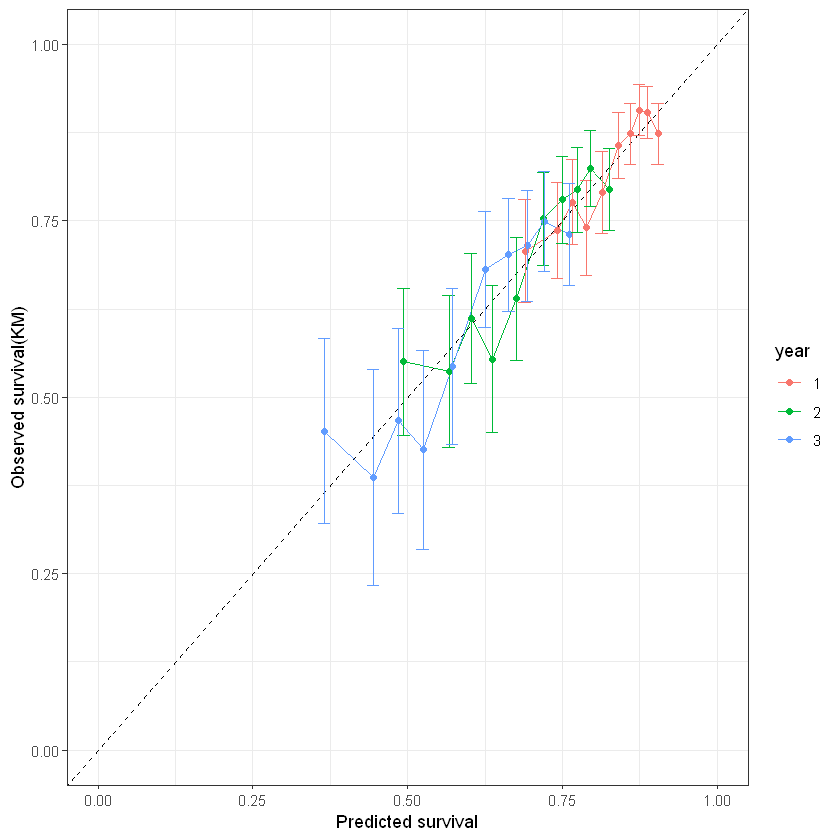

In [26]:
# 在外部测试集上建立模型并计算校准度
# 一年生存期校准曲线为例
no_group <- 10
m <- nrow(dataset_external) / no_group

test_model1 <- cph(Surv(AKI_time*365, AKI_status) ~ pre, data=dataset_external, surv=T, x=T, y=T, time.inc=365)
cal1 <- calibrate(test_model1, cmethod="KM", m=m, u=365)
cal1 <- as.data.frame(cal1[,c("mean.predicted","KM", "std.err")]) %>% mutate(year = 1)

# 二年生存期校准曲线为例
test_model2 <- cph(Surv(AKI_time*365, AKI_status) ~ pre, data=dataset_external, surv=T, x=T, y=T, time.inc=365*2)
cal2 <- calibrate(test_model2, cmethod="KM", m=m, u=365*2)
cal2 <- as.data.frame(cal2[,c("mean.predicted","KM", "std.err")]) %>% mutate(year = 2)

# 三年生存期校准曲线为例
test_model3 <- cph(Surv(AKI_time*365, AKI_status) ~ pre, data=dataset_external, surv=T, x=T, y=T, time.inc=365*3)
cal3 <- calibrate(test_model3, cmethod="KM", m=m, u=365*3)
cal3 <- as.data.frame(cal3[,c("mean.predicted","KM", "std.err")]) %>% mutate(year = 3)

cal <- rbind(cal1, cal2, cal3)
cal[,"year"] <- as.factor(cal[,"year"])

ggplot(cal, aes(x = mean.predicted, y = KM, group= year, colour = year)) +
    geom_line() +
    geom_point() +
    xlab("Predicted survival") +
    ylab("Observed survival(KM)") +
    scale_x_continuous(limit=c(0,1)) +
    scale_y_continuous(limit=c(0,1)) +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
    geom_errorbar(aes(ymax = (KM+1.96*std.err),ymin = (KM-1.96*std.err)), width=0.02) +
    theme_bw()

上述过程为外部验证，在训练集上经LASSO回归筛选变量并重新拟合后的模型，在测试集上计算得到的校准曲线如图所示。

该图横轴对应预测生存概率，纵轴为实际生存概率，3条校准曲线的不同颜色代表1年、2年、3年的生存期，每条曲线有10个数据点代表所有预测样本的预测概率被划分为10份，各点的误差线代表实际观测概率的95%置信区间上下限。

图中校准曲线沿对角线紧密贴合，波动程度较小，说明该方法所得模型校准度较好。

### （4）决策曲线（Decision curve analysis)

In [27]:
test_model <- cph(Surv(AKI_time, AKI_status) ~ pre, data = dataset_external, surv=T, x=T, y=T)

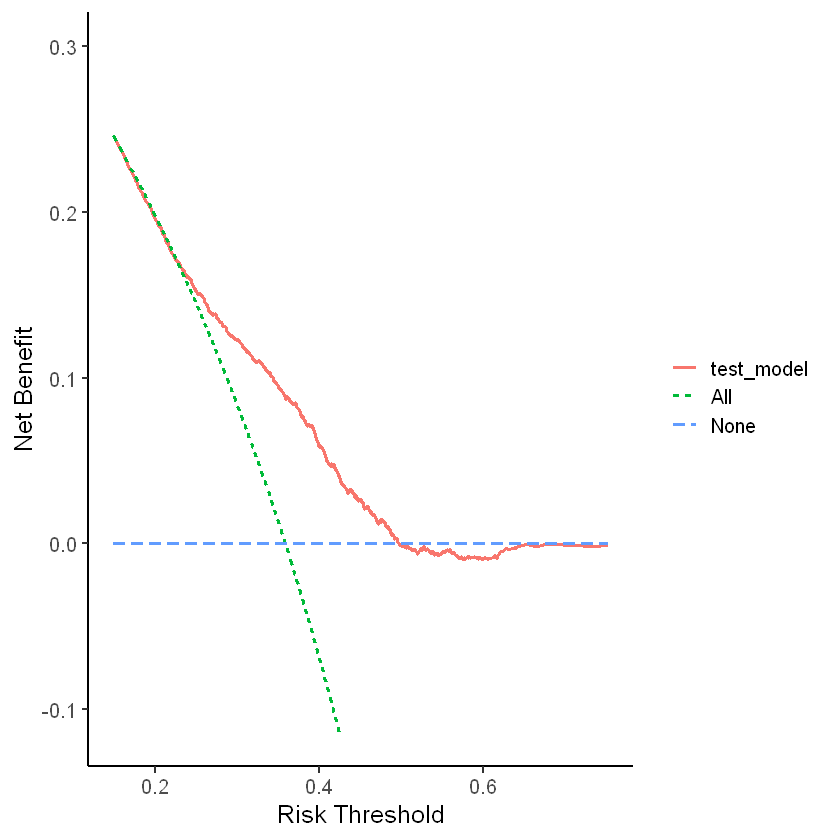

In [28]:
dca_plot <- dca(test_model)
options(warn=-1)
ggplot(dca_plot)

在训练集上经LASSO回归筛选变量并重新拟合后的模型，在测试集上计算得到的决策曲线如图所示。

该图横轴代表阈概率，纵轴代表净获益，“All”参考线与“None”参考线分别代表所有的患者均纳入干预与均不纳入干预时各阈概率下的净获益水平。

可见，阈概率在约＜0.5的水平下时，该模型存在一定获益。

In [29]:
save.image("model_validation_workspace.Rdata")